# American Express - Analyze This 2019 Solution (Second Attempt)
-------------------------------

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('development_dataset.csv')

In [3]:
train_data.head()

VAR1        VAR2      VAR3        VAR4        VAR5      VAR6      VAR7  \
0     1  828.235294  0.138889  321.428571  625.911006  1.818182  1.081550   
1     2  911.764706  0.027778         NaN  611.574748  8.181818  1.344479   
2     3  962.352941  0.833333   35.714286  615.825381  8.181818  0.720796   
3     4  892.941177       NaN         NaN  638.076431  9.090909  0.820218   
4     5  914.117647  0.083333         NaN  626.514988  5.181818  1.372928   

         VAR8       VAR9      VAR10  ...       VAR12  VAR13  VAR14 VAR15  \
0  198.113469        NaN  58.632548  ...  100.083403    1.0      1   1.0   
1  198.600020  22.086661        NaN  ...   15.012510    NaN      1   NaN   
2  197.267767        NaN  58.632548  ...  210.175146   10.0      1  10.0   
3  197.355744   4.363431  58.632548  ...         NaN    NaN      1   NaN   
4  198.790477  85.938202  58.632548  ...  210.175146    NaN      .   NaN   

      VAR16  VAR17  VAR18  VAR19       VAR20   VAR21  
0  1.540594    NaN      1      0  100.104991     Low  
1  1.614613    NaN      0      1  146.654045    High  
2  1.044599    NaN      0      0   98.249570  Medium  
3  1.145729    NaN      1      0  140.862306     Low  
4  1.558341    NaN      1      0  101.268503    High  

[5 rows x 21 columns]

In [4]:
train_data.shape

(34000, 21)

# Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, val = train_test_split(train_data, test_size = 0.25, random_state=2)

In [7]:
train.shape

(25500, 21)

In [8]:
val.shape

(8500, 21)

# Data Exploration

## Checking Data Types

In [9]:
for col in train.columns:
    print(col, train[col].dtype)

VAR1 int64
VAR2 float64
VAR3 float64
VAR4 float64
VAR5 float64
VAR6 float64
VAR7 float64
VAR8 float64
VAR9 float64
VAR10 float64
VAR11 float64
VAR12 float64
VAR13 float64
VAR14 object
VAR15 float64
VAR16 float64
VAR17 float64
VAR18 int64
VAR19 int64
VAR20 float64
VAR21 object


## Step1: Changing VAR14 to Integer and also creating NaN values

In [10]:
train['VAR14'].replace('.', np.nan, inplace = True)
train['VAR14'] = pd.to_numeric(train['VAR14'])

E:\AnacondaInstaller\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\AnacondaInstaller\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
train['VAR14'].value_counts()

1.0     15618
2.0      5985
3.0      2102
4.0       687
0.0       557
5.0       202
6.0        82
7.0        18
8.0        16
10.0        9
12.0        8
9.0         6
11.0        2
15.0        2
22.0        1
18.0        1
20.0        1
23.0        1
Name: VAR14, dtype: int64

# Checking Duplicate Entries

In [12]:
train[train.duplicated()]

Empty DataFrame
Columns: [VAR1, VAR2, VAR3, VAR4, VAR5, VAR6, VAR7, VAR8, VAR9, VAR10, VAR11, VAR12, VAR13, VAR14, VAR15, VAR16, VAR17, VAR18, VAR19, VAR20, VAR21]
Index: []

[0 rows x 21 columns]

## Comment: No dulicate rows

## Checking amount of missing values

In [13]:
for col in train.columns:
    print(col, 100*train[col].isnull().sum()/train[col].shape[0])

VAR1 0.0
VAR2 2.803921568627451
VAR3 9.92156862745098
VAR4 36.63921568627451
VAR5 0.00392156862745098
VAR6 10.325490196078432
VAR7 2.462745098039216
VAR8 2.462745098039216
VAR9 46.74901960784314
VAR10 13.309803921568628
VAR11 22.2078431372549
VAR12 30.827450980392157
VAR13 24.99607843137255
VAR14 0.792156862745098
VAR15 23.545098039215688
VAR16 2.549019607843137
VAR17 65.18823529411765
VAR18 0.0
VAR19 0.0
VAR20 0.0
VAR21 0.0


## Step2: Deleting VAR9 and VAR17 owing to >40% missing values

In [14]:
train.drop(['VAR9','VAR17'], axis = 1, inplace=True)

E:\AnacondaInstaller\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Step 3: Setting VAR1 as index

In [15]:
train.set_index('VAR1', inplace=True)

# Univariate Exploration

In [16]:
categorical_features = ['VAR19', 'VAR21']
discrete_features = ['VAR12', 'VAR14', 'VAR18']
numerical_features = []
for col in train.columns:
    if (col not in categorical_features) & (col not in discrete_features):
        numerical_features.append(col)

In [17]:
numerical_features

['VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR10',
 'VAR11',
 'VAR13',
 'VAR15',
 'VAR16',
 'VAR20']

### Checking Distributions

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


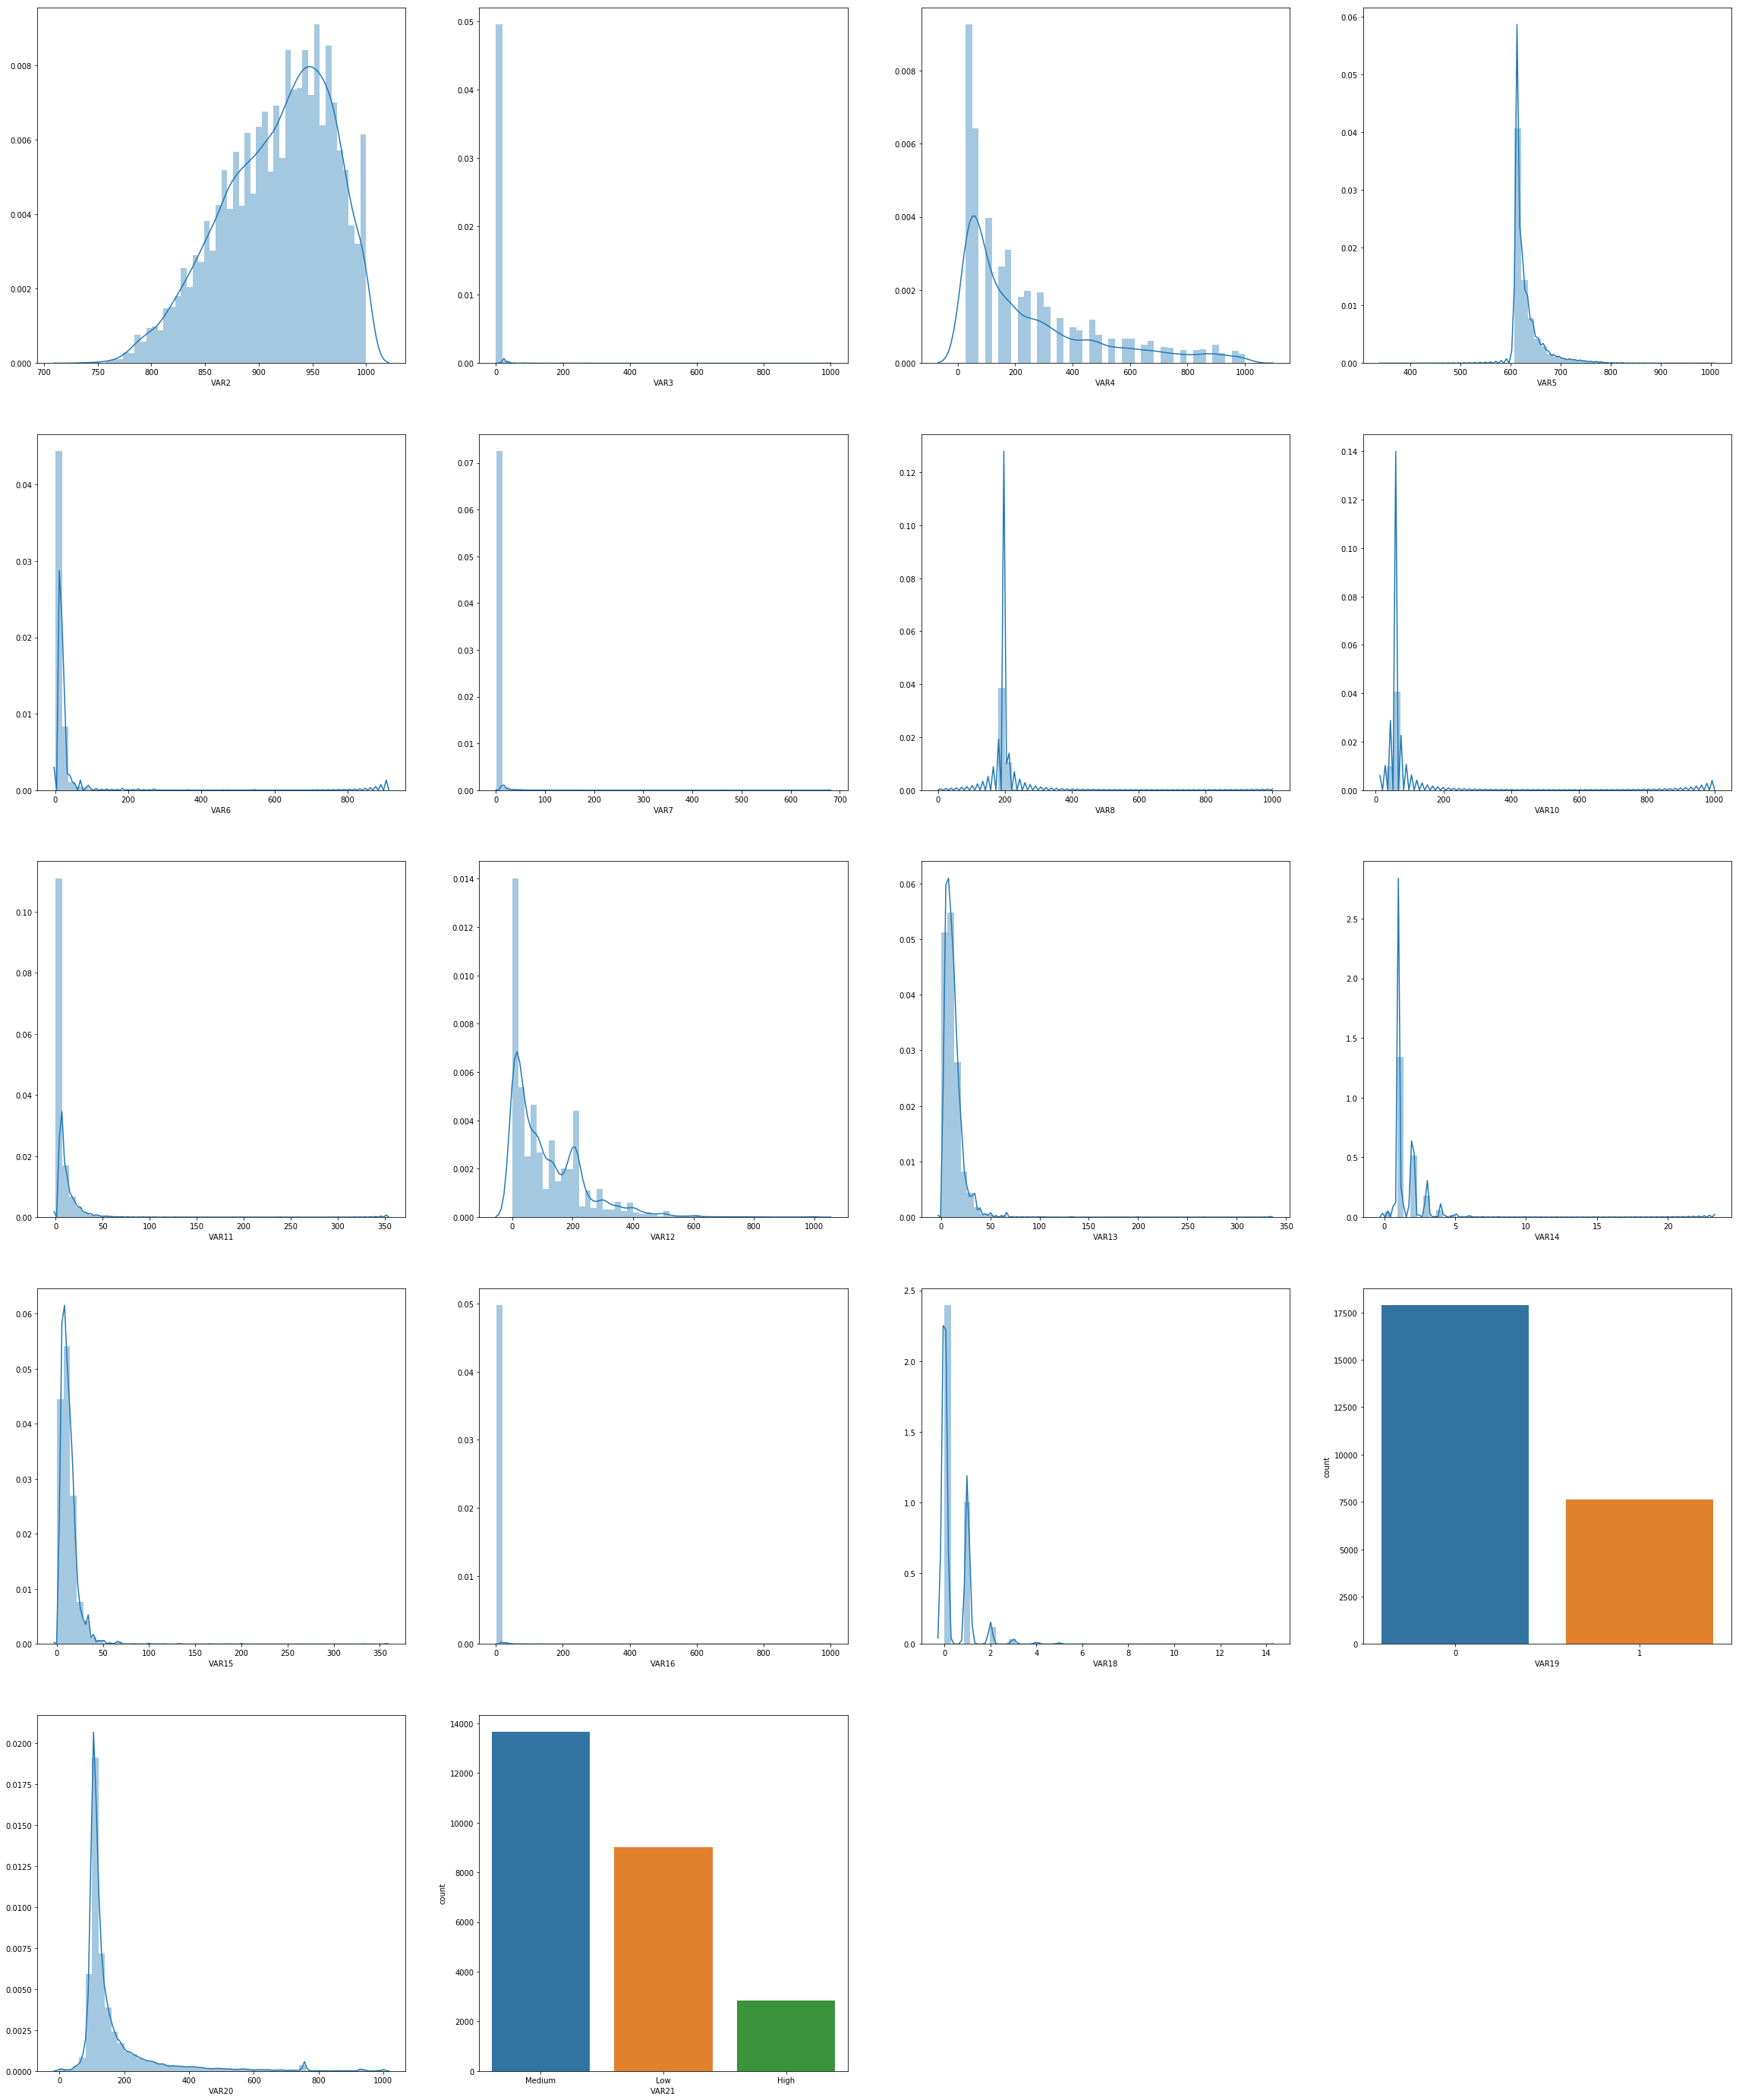

In [19]:
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(train.columns):
    ax = fig.add_subplot(5, 4, i+1)
    if col not in categorical_features:
        sns.distplot(train[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(train[col].dropna(), ax=ax, label=col)

In [20]:
train.describe()

VAR2          VAR3          VAR4          VAR5          VAR6  \
count  24785.000000  22970.000000  16157.000000  25499.000000  22867.000000   
mean     917.370516      1.155123    247.899672    631.563786     15.364334   
std       50.314593     13.406947    240.534261     30.963901     29.825067   
min      730.588235      0.001333     28.571429    347.053355      0.005000   
25%      882.352941      0.083333     71.428571    611.705173      6.636364   
50%      924.705882      0.166667    142.857143    619.816915     10.000000   
75%      956.470588      0.555556    357.142857    637.403297     18.181818   
max     1000.000000   1000.000000   1000.000000   1000.000000    909.090818   

               VAR7          VAR8         VAR10         VAR11         VAR12  \
count  24872.000000  24872.000000  22106.000000  19837.000000  17639.000000   
mean       2.088210    200.064280     56.493790      5.393323    117.327397   
std        9.707281     11.948707      7.558947     10.448583    120.849700   
min        0.353228      0.000000     13.028620      0.000693      0.834028   
25%        0.693121    197.196705     57.449518      0.638932     15.846539   
50%        1.001567    197.919713     58.632548      2.105982     80.066722   
75%        1.739874    199.679881     58.632548      6.053227    190.158465   
max      681.582083   1000.000000   1000.000000    352.525100   1000.000000   

              VAR13         VAR14         VAR15         VAR16         VAR18  \
count  19126.000000  25298.000000  19496.000000  24850.000000  25500.000000   
mean      11.662239      1.532651     12.441171      2.119043      0.401294   
std        9.926680      0.992471     11.267748      8.764092      0.684650   
min        0.082667      0.000000      0.133333      0.959315      0.000000   
25%        5.733333      1.000000      6.666667      1.042257      0.000000   
50%       10.000000      1.000000     10.000000      1.264980      0.000000   
75%       15.333333      2.000000     16.333333      1.835844      1.000000   
max      333.333333     23.000000    356.666667   1000.000000     14.000000   

              VAR19         VAR20  
count  25500.000000  25500.000000  
mean       0.298863    161.291169  
std        0.457769    122.763979  
min        0.000000      0.000000  
25%        0.000000    104.359725  
50%        0.000000    117.562823  
75%        1.000000    159.952237  
max        1.000000   1000.000000

### Univariate Exploration Observations:
- Highly imbalanced Dataset (class label)
- VAR3, VAR6, VAR7, VAR16 highly right skew
- Presence of noise in VAR4, VAR8, VAR10
- Right skewness in other variables too

# Bivariate Explorations

## Scatter Plots

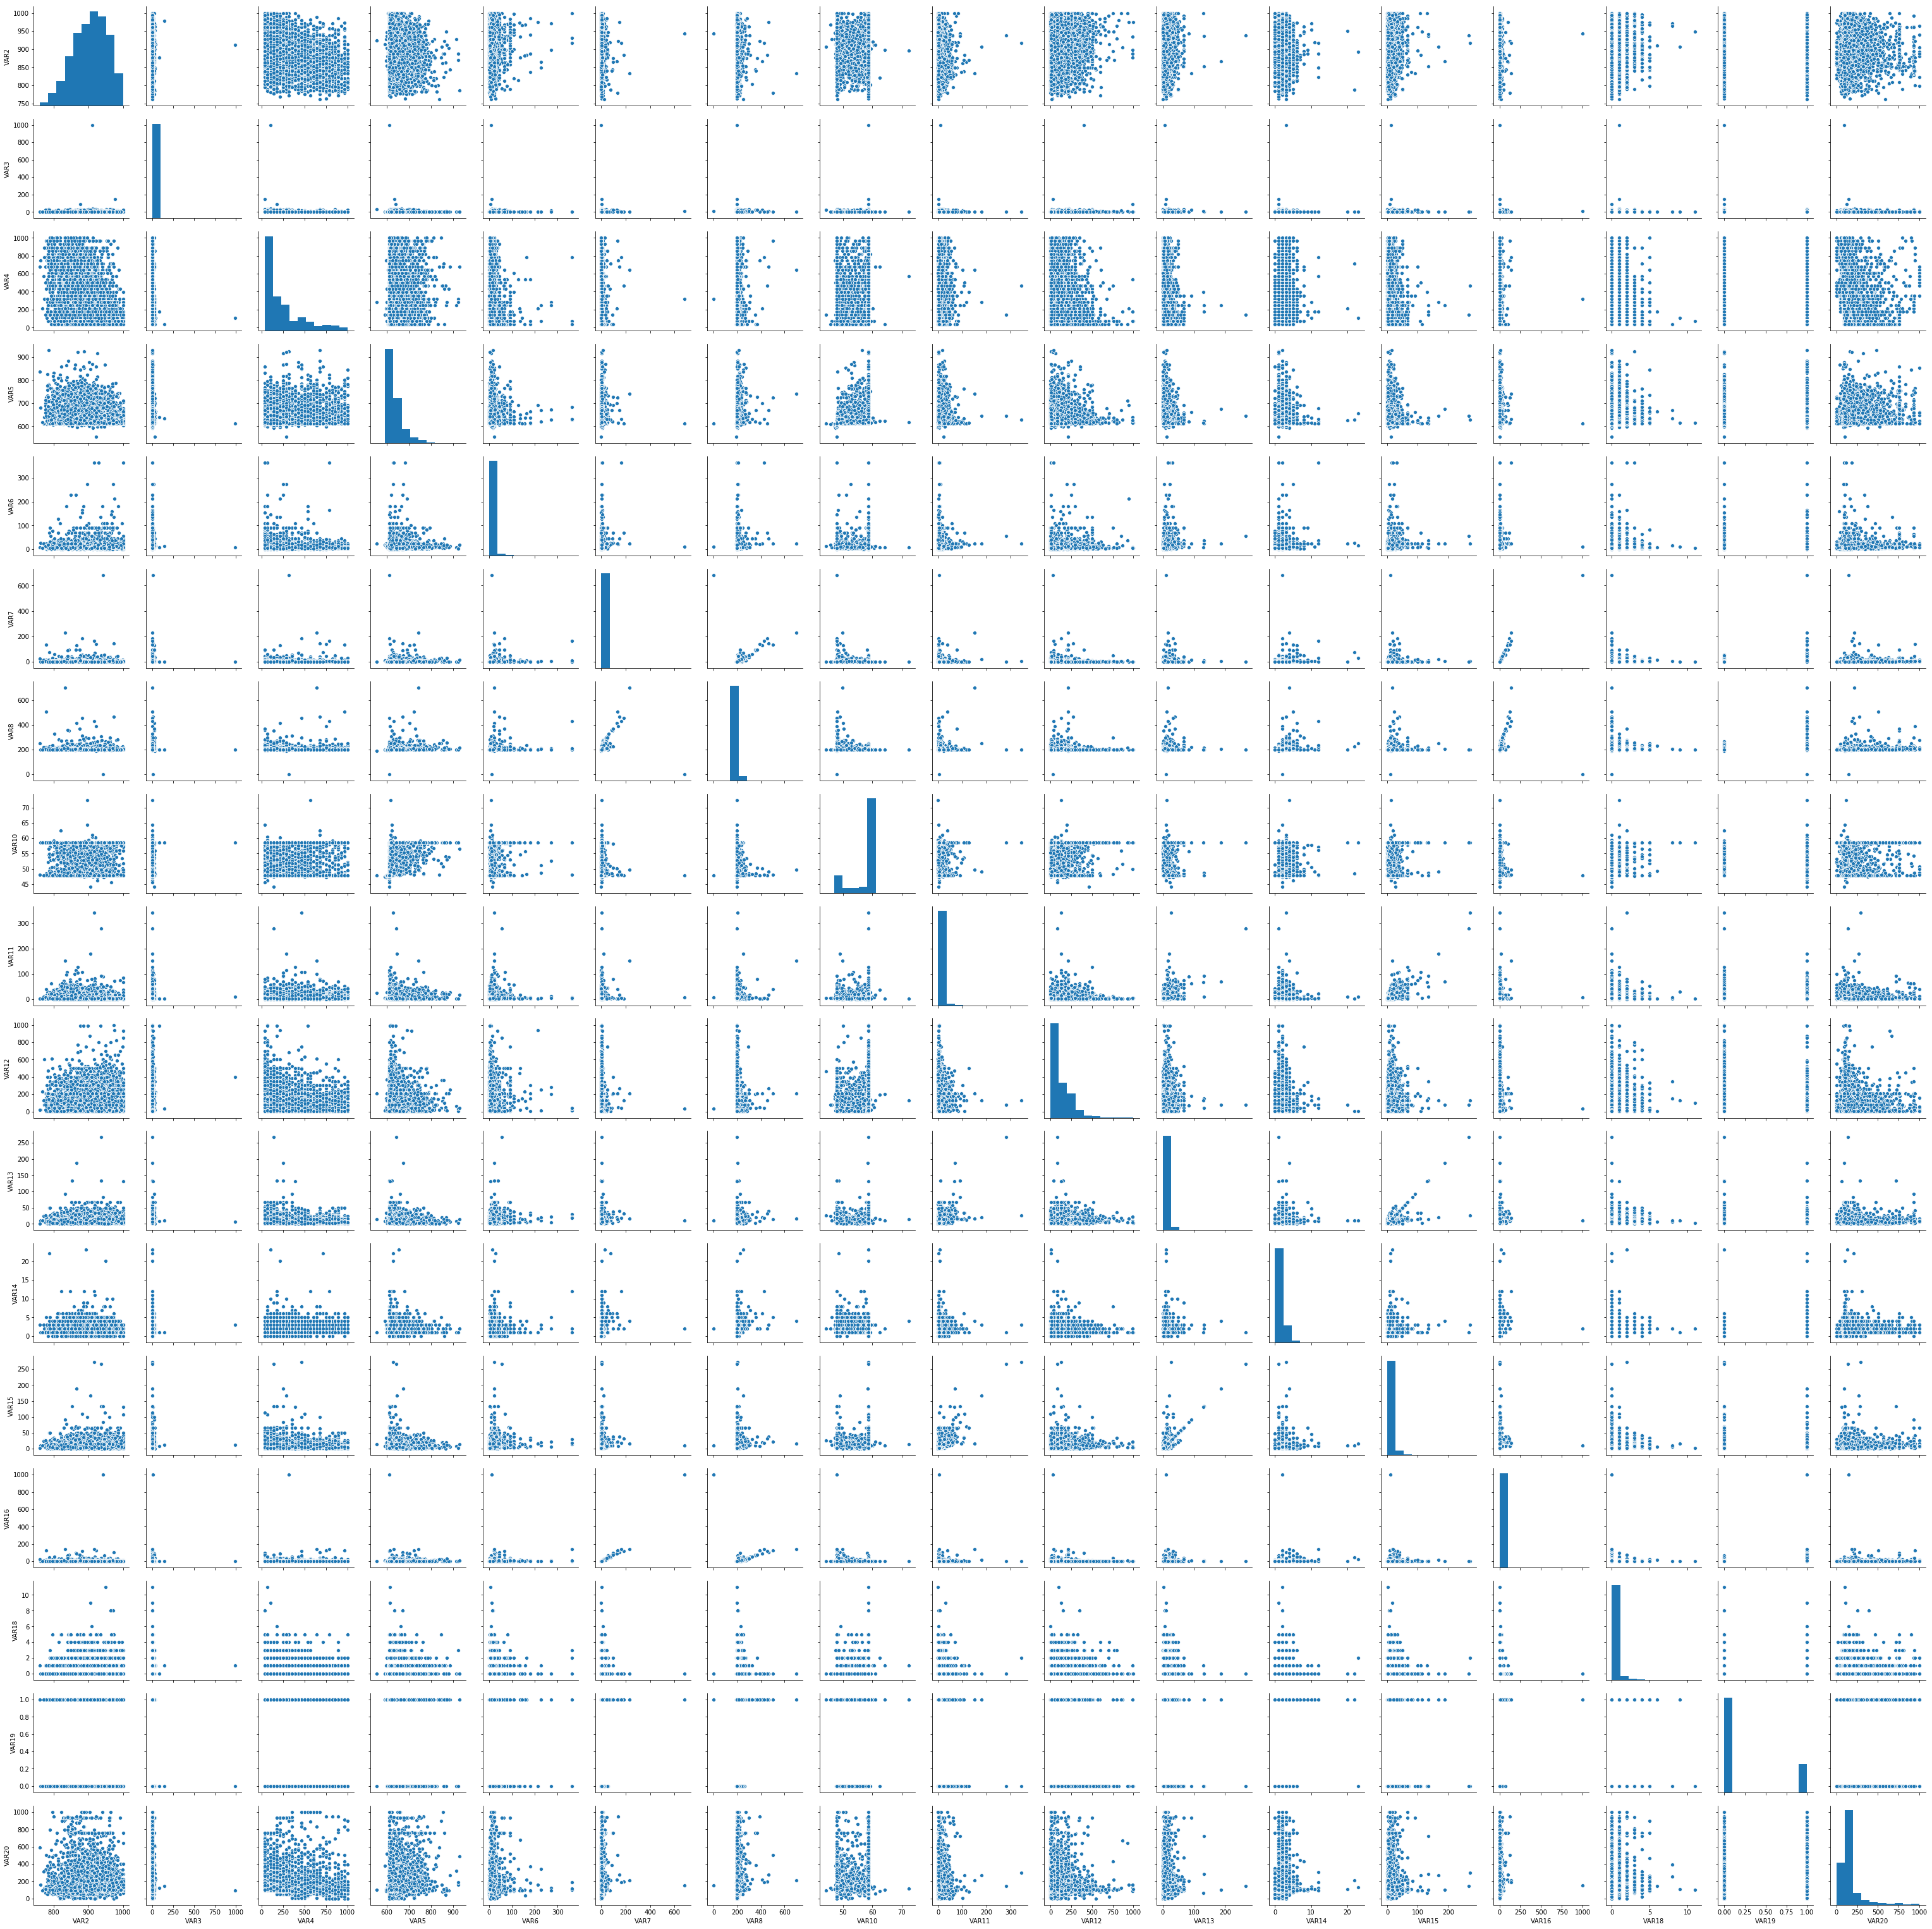

In [21]:
sns.pairplot(train.dropna())

## Comments from Pairplot
- There seems to be an outlier in VAR3, VAR7, VAR8 and VAR16
- Some linear relationship between VAR7, VAR8, VAR16
- Some amount of linear relationship between VAR13 and VAR15

## Checking the Outlier

In [22]:
train[train.VAR3>750]

VAR2         VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                          
25436  911.764706   993.333333  107.142857  611.618514   9.090909  0.562338   
25815  970.588235  1000.000000         NaN  612.357298   8.363636  0.661377   
30618  871.764706  1000.000000  178.571429  725.951447  18.181818  0.869315   

             VAR8      VAR10     VAR11       VAR12      VAR13  VAR14  \
VAR1                                                                   
25436  196.916682  58.632548  8.717755  400.333611   6.666667    3.0   
25815  196.990082  58.632548  1.787902         NaN  13.066667    1.0   
30618  199.308986  58.632548  3.704007         NaN   6.600000    1.0   

           VAR15     VAR16  VAR18  VAR19       VAR20   VAR21  
VAR1                                                          
25436  11.666667  0.959315      1      0   96.041308  Medium  
25815  13.066667  1.035685      0      0  154.648881  Medium  
30618   6.600000  1.394753      1      0  185.581756  Medium

In [23]:
train[train.VAR7>500]

VAR2      VAR3        VAR4        VAR5        VAR6        VAR7  \
VAR1                                                                          
30400  917.647059  0.111111  285.714286  631.327588  181.818182  536.490229   
29583  836.470588  4.166667         NaN  644.462885   22.727273  649.324982   
32847  943.529412  5.555556  321.428571  611.574748   11.363636  681.582083   

              VAR8      VAR10      VAR11       VAR12  VAR13  VAR14  VAR15  \
VAR1                                                                        
30400  1000.000000  47.989842  35.320769         NaN   40.0    3.0   40.0   
29583   412.897858  48.057459   0.065834  155.129274    2.8    3.0    2.8   
32847     0.000000  47.899686   5.112153   31.693078   10.0    2.0   10.0   

             VAR16  VAR18  VAR19       VAR20 VAR21  
VAR1                                                
30400   195.246898      1      1  146.865749   Low  
29583   420.464217      0      1  756.626506  High  
32847  1000.000000      0      1  148.583477   Low

In [24]:
train[train.VAR16>750]

VAR2      VAR3        VAR4        VAR5       VAR6        VAR7  \
VAR1                                                                         
32847  943.529412  5.555556  321.428571  611.574748  11.363636  681.582083   

       VAR8      VAR10     VAR11      VAR12  VAR13  VAR14  VAR15   VAR16  \
VAR1                                                                       
32847   0.0  47.899686  5.112153  31.693078   10.0    2.0   10.0  1000.0   

       VAR18  VAR19       VAR20 VAR21  
VAR1                                   
32847      0      1  148.583477   Low

In [25]:
train[train.VAR8<100]

VAR2      VAR3        VAR4        VAR5       VAR6        VAR7  \
VAR1                                                                         
32847  943.529412  5.555556  321.428571  611.574748  11.363636  681.582083   

       VAR8      VAR10     VAR11      VAR12  VAR13  VAR14  VAR15   VAR16  \
VAR1                                                                       
32847   0.0  47.899686  5.112153  31.693078   10.0    2.0   10.0  1000.0   

       VAR18  VAR19       VAR20 VAR21  
VAR1                                   
32847      0      1  148.583477   Low

In [26]:
train[train.VAR5<500]

VAR2      VAR3  VAR4        VAR5       VAR6       VAR7  \
VAR1                                                                  
14588  885.882353  1.165367   NaN  347.053355  31.818182  52.228776   

             VAR8      VAR10  VAR11      VAR12  VAR13  VAR14  VAR15  \
VAR1                                                                  
14588  156.320348  47.899686    NaN  20.016681    NaN    1.0    NaN   

           VAR16  VAR18  VAR19       VAR20   VAR21  
VAR1                                                
14588  37.196697      1      0  332.432014  Medium

**Comment: We can remove the outliers found from VAR3 because all of the target variables are MEdium (which won't affect if the Medium variables go slightly down). And we remove the common outlier between VAR7 and VAR16**

## Step3: Remove the outlier

In [27]:
train.drop(32847, axis=0, inplace=True) #Common in VAR7, VAR8 and VAR16
train.drop([25436, 25815, 30618], axis=0, inplace=True) #Outliers in VAR3
train.drop(14588, axis=0, inplace=True) #Outlier in VAR5

E:\AnacondaInstaller\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


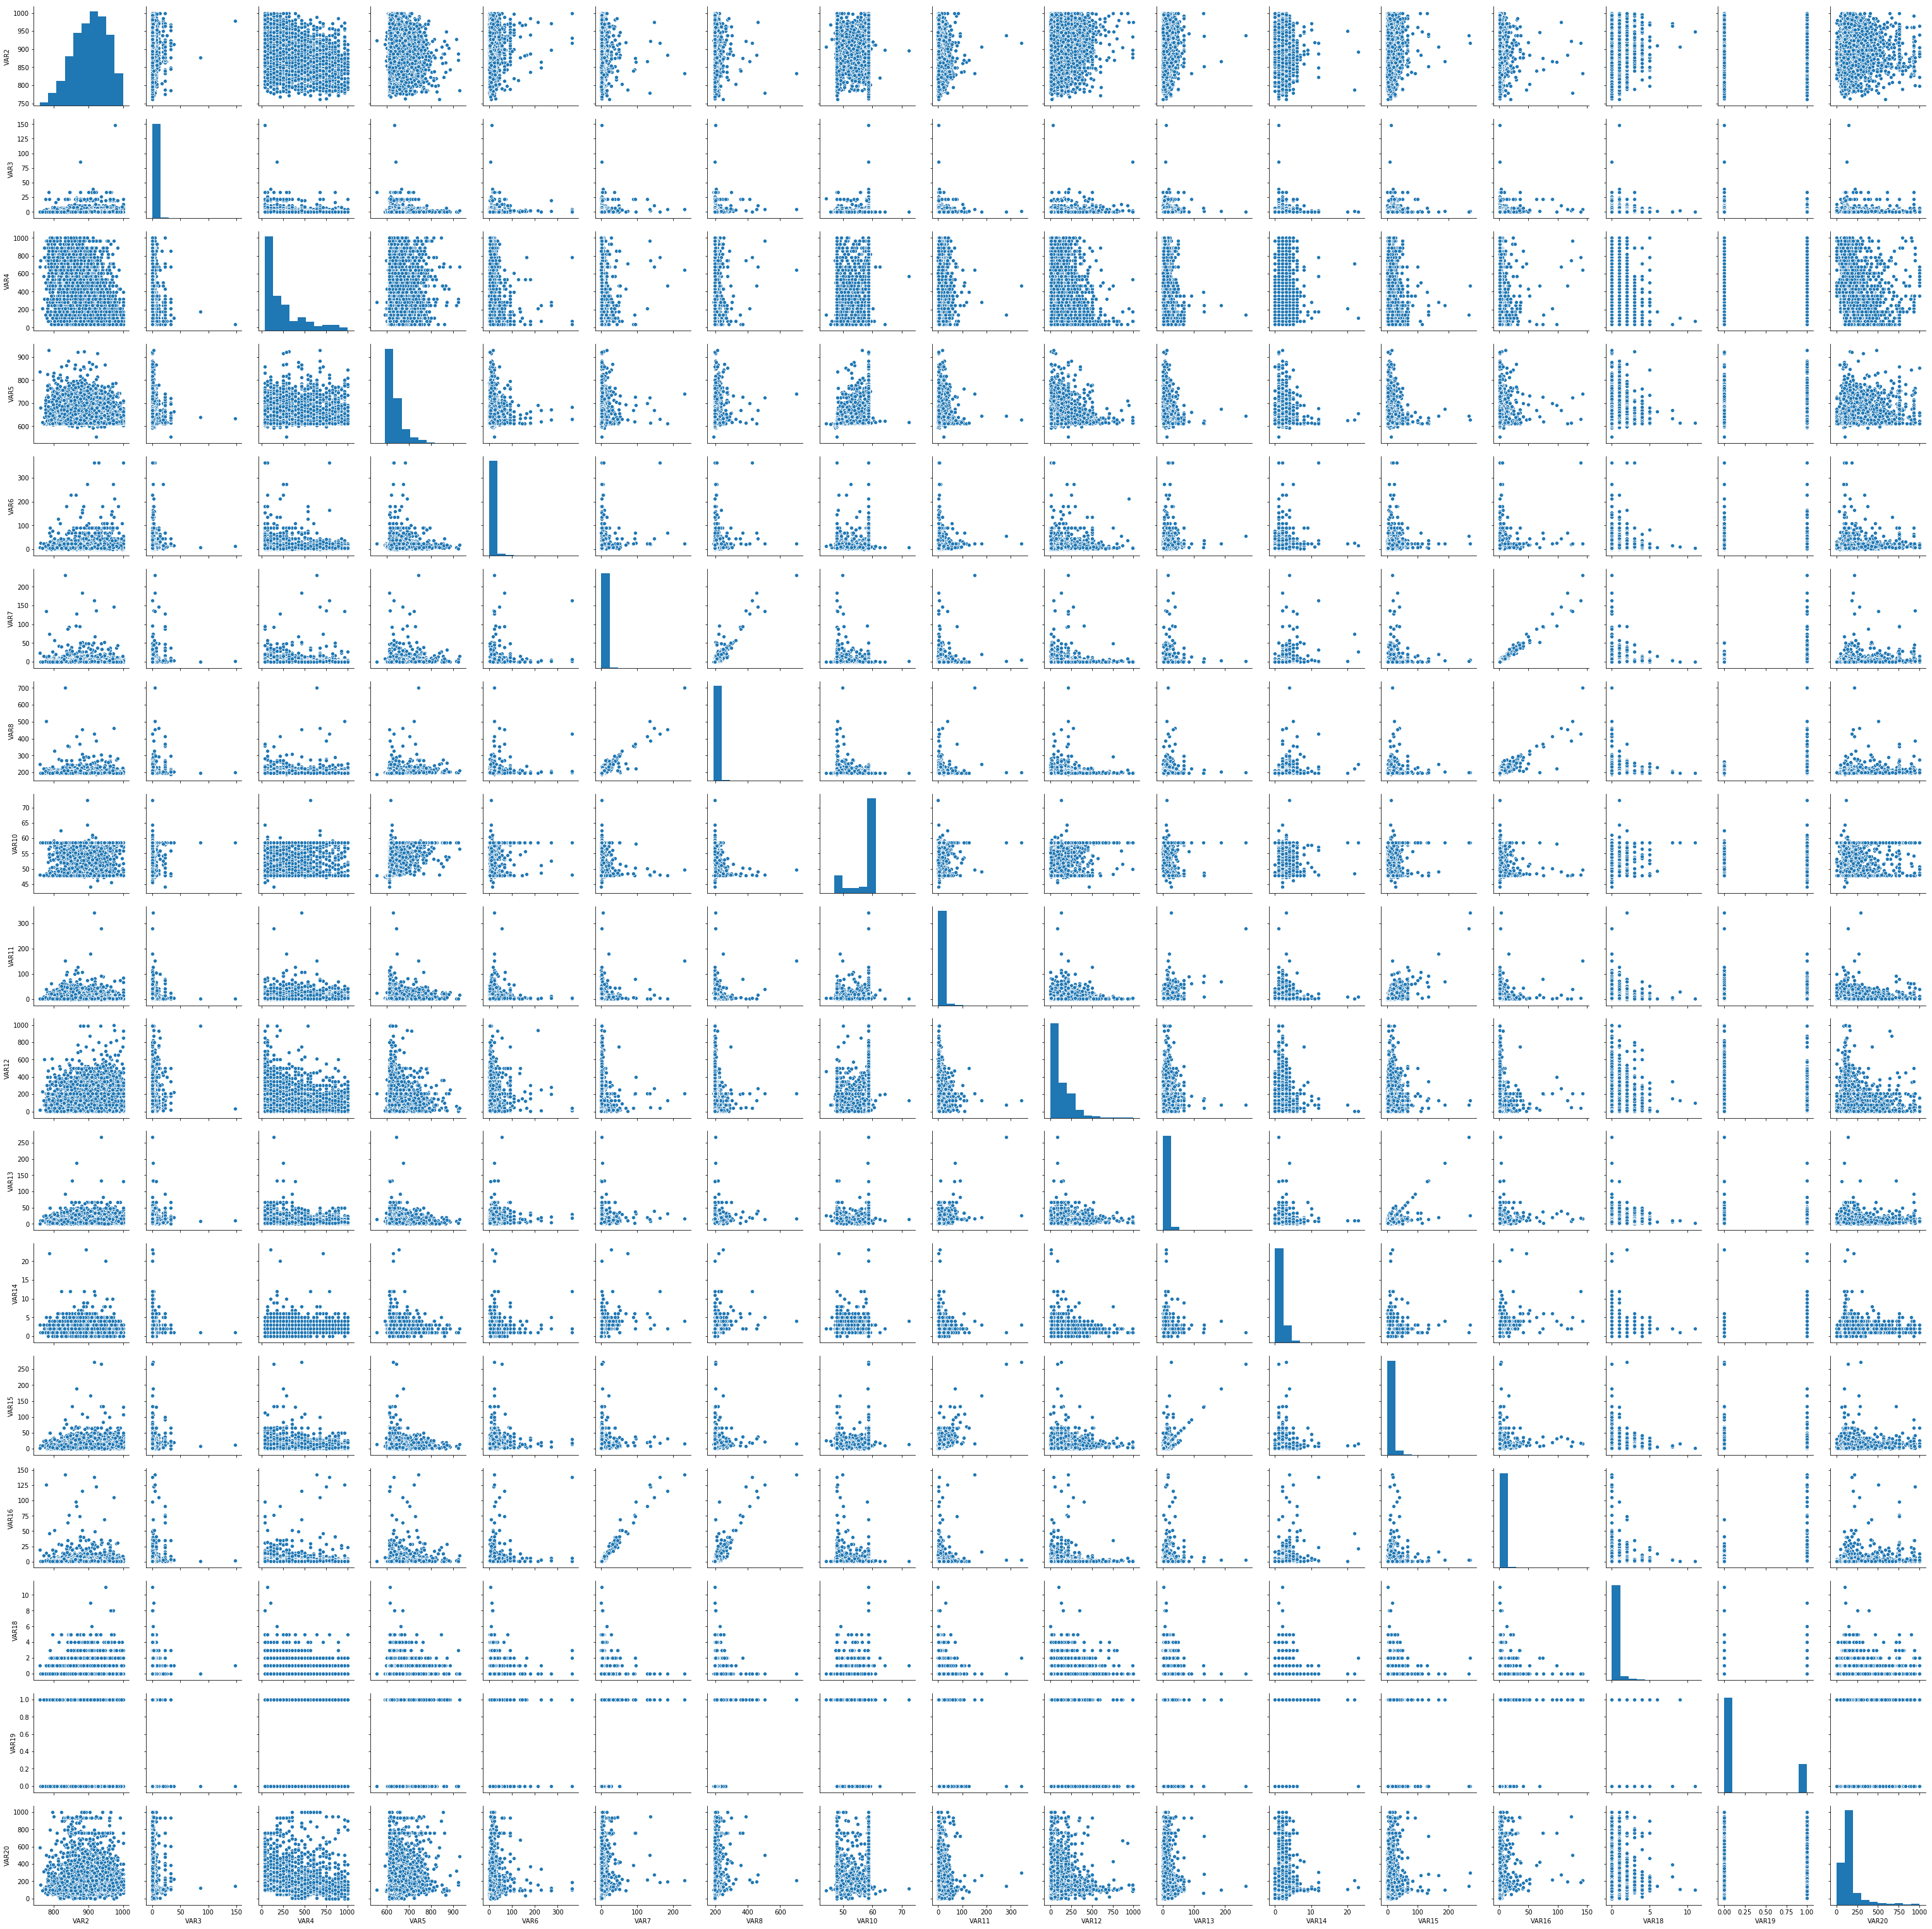

In [28]:
sns.pairplot(train.dropna())

### Comment: The variance in VAR3, VAR7 and VAR16 have been increased for good

## Checking relationships between variables

In [29]:
train.corr()

VAR2      VAR3      VAR4      VAR5      VAR6      VAR7      VAR8  \
VAR2   1.000000  0.009864 -0.517579 -0.198724  0.026675 -0.031543 -0.049770   
VAR3   0.009864  1.000000 -0.017925  0.008277  0.053160  0.036016  0.049029   
VAR4  -0.517579 -0.017925  1.000000  0.207805 -0.030379  0.016928  0.062811   
VAR5  -0.198724  0.008277  0.207805  1.000000  0.029180  0.086414  0.195889   
VAR6   0.026675  0.053160 -0.030379  0.029180  1.000000  0.101879  0.128551   
VAR7  -0.031543  0.036016  0.016928  0.086414  0.101879  1.000000  0.833459   
VAR8  -0.049770  0.049029  0.062811  0.195889  0.128551  0.833459  1.000000   
VAR10  0.037915 -0.005679 -0.029375  0.127194  0.163254 -0.030515 -0.066906   
VAR11 -0.182472  0.014840  0.207945  0.092146  0.059041  0.077207  0.136436   
VAR12  0.147454  0.119086 -0.104517 -0.054466  0.031376 -0.004135 -0.000243   
VAR13  0.149245  0.035828 -0.108166 -0.052832  0.141122  0.080258  0.103449   
VAR14 -0.049337  0.008522  0.053401  0.034701  0.049995  0.161993  0.204404   
VAR15  0.109437  0.029355 -0.062226 -0.037512  0.122317  0.072584  0.098746   
VAR16 -0.035663  0.038817  0.020074  0.100476  0.104747  0.967459  0.804630   
VAR18  0.063190  0.018883 -0.044342  0.038855  0.046929  0.029359  0.043761   
VAR19 -0.057745  0.018817  0.110291 -0.132372  0.080001  0.119156  0.165127   
VAR20 -0.107153  0.038074  0.045976  0.224571  0.074294  0.128345  0.168143   

          VAR10     VAR11     VAR12     VAR13     VAR14     VAR15     VAR16  \
VAR2   0.037915 -0.182472  0.147454  0.149245 -0.049337  0.109437 -0.035663   
VAR3  -0.005679  0.014840  0.119086  0.035828  0.008522  0.029355  0.038817   
VAR4  -0.029375  0.207945 -0.104517 -0.108166  0.053401 -0.062226  0.020074   
VAR5   0.127194  0.092146 -0.054466 -0.052832  0.034701 -0.037512  0.100476   
VAR6   0.163254  0.059041  0.031376  0.141122  0.049995  0.122317  0.104747   
VAR7  -0.030515  0.077207 -0.004135  0.080258  0.161993  0.072584  0.967459   
VAR8  -0.066906  0.136436 -0.000243  0.103449  0.204404  0.098746  0.804630   
VAR10  1.000000 -0.050514  0.037512 -0.017956 -0.090312 -0.022194 -0.025085   
VAR11 -0.050514  1.000000  0.032588  0.377474  0.063615  0.580352  0.074638   
VAR12  0.037512  0.032588  1.000000  0.113745 -0.022671  0.106164 -0.005594   
VAR13 -0.017956  0.377474  0.113745  1.000000  0.045765  0.854541  0.082179   
VAR14 -0.090312  0.063615 -0.022671  0.045765  1.000000  0.048504  0.172839   
VAR15 -0.022194  0.580352  0.106164  0.854541  0.048504  1.000000  0.074428   
VAR16 -0.025085  0.074638 -0.005594  0.082179  0.172839  0.074428  1.000000   
VAR18  0.018331  0.033386  0.079857  0.070854 -0.017816  0.065011  0.032430   
VAR19 -0.227608  0.077608  0.030077  0.074165  0.332955  0.075338  0.125161   
VAR20 -0.021651  0.084906 -0.073671  0.036171  0.021922  0.038614  0.141516   

          VAR18     VAR19     VAR20  
VAR2   0.063190 -0.057745 -0.107153  
VAR3   0.018883  0.018817  0.038074  
VAR4  -0.044342  0.110291  0.045976  
VAR5   0.038855 -0.132372  0.224571  
VAR6   0.046929  0.080001  0.074294  
VAR7   0.029359  0.119156  0.128345  
VAR8   0.043761  0.165127  0.168143  
VAR10  0.018331 -0.227608 -0.021651  
VAR11  0.033386  0.077608  0.084906  
VAR12  0.079857  0.030077 -0.073671  
VAR13  0.070854  0.074165  0.036171  
VAR14 -0.017816  0.332955  0.021922  
VAR15  0.065011  0.075338  0.038614  
VAR16  0.032430  0.125161  0.141516  
VAR18  1.000000  0.032718  0.099342  
VAR19  0.032718  1.000000  0.092779  
VAR20  0.099342  0.092779  1.000000

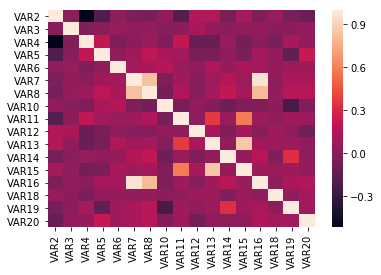

In [30]:
sns.heatmap(train.corr())

## Comment:
- Correlation between VAR7 and VAR16: 0.96
- Correlation between VAR7 and VAR8: 0.83
- Correlation between VAR8 and VAR16: 0.80

###  We will drop the VAR16, because in observing the Data Dictionary it is a 3month variable, while we are dealing with 6 months variables

In [31]:
train.VAR7.isnull().sum()

628

In [32]:
train.VAR16.isnull().sum()

650

In [33]:
(train.VAR7.isnull() & train.VAR16.isnull()).sum()

627

## Step3: Dropping VAR16 on account of redudancy

In [34]:
train.drop('VAR16', axis=1, inplace=True)

E:\AnacondaInstaller\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## TODO: Statistical Tests (Q->C)

# Target Labels

In [39]:
y_train = train['VAR21'].map({'Low':-1, 'Medium':0, 'High':1})
X_train = train.drop('VAR21', axis=1)

# Missing Value Imputation

### Comments:
- VAR12, VAR14, VAR18, VAR19 by most frequent
- Others by median

In [40]:
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#Most Frequent imputation
imp_freq.fit(X_train[['VAR14', 'VAR18', 'VAR19']])
X_train[['VAR14', 'VAR18', 'VAR19']] = imp_freq.transform(X_train[['VAR14', 'VAR18', 'VAR19']])

#Median Imputation
imp_med.fit(X_train)
X_train_new = pd.DataFrame(imp_med.transform(X_train), index=X_train.index, columns = X_train.columns)

In [41]:
X_train_new.head()

VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                       
6730   982.352941  1.000000   71.428571  611.574748  10.000000  0.870128   
12884  910.588235  0.083333  892.857143  638.788955   8.181818  2.932957   
12749  874.117647  0.138889  178.571429  612.007164  13.636364  1.437929   
27420  931.764706  2.405556  142.857143  636.772180  10.909091  1.741903   
24498  937.647059  0.833333  178.571429  613.050565   7.272727  0.585434   

             VAR8      VAR10      VAR11       VAR12      VAR13  VAR14  \
VAR1                                                                    
6730   197.682893  47.899686   3.580655   80.066722  20.000000    2.0   
12884  200.014723  58.632548   2.105289   40.033361  10.000000    2.0   
12749  197.449262  48.141176  11.596416  200.166806  12.333333    2.0   
27420  199.668570  58.632548   2.105289   80.066722  10.000000    3.0   
24498  196.962029  58.632548   2.133702   80.066722   8.666667    1.0   

           VAR15  VAR18  VAR19       VAR20  
VAR1                                        
6730   20.000000    0.0    1.0  141.745267  
12884  10.000000    0.0    0.0  121.888124  
12749  12.333333    0.0    1.0   94.567986  
27420  10.000000    1.0    0.0  756.626506  
24498   8.666667    0.0    0.0  110.149742

## Plots after Missing Value imputation

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


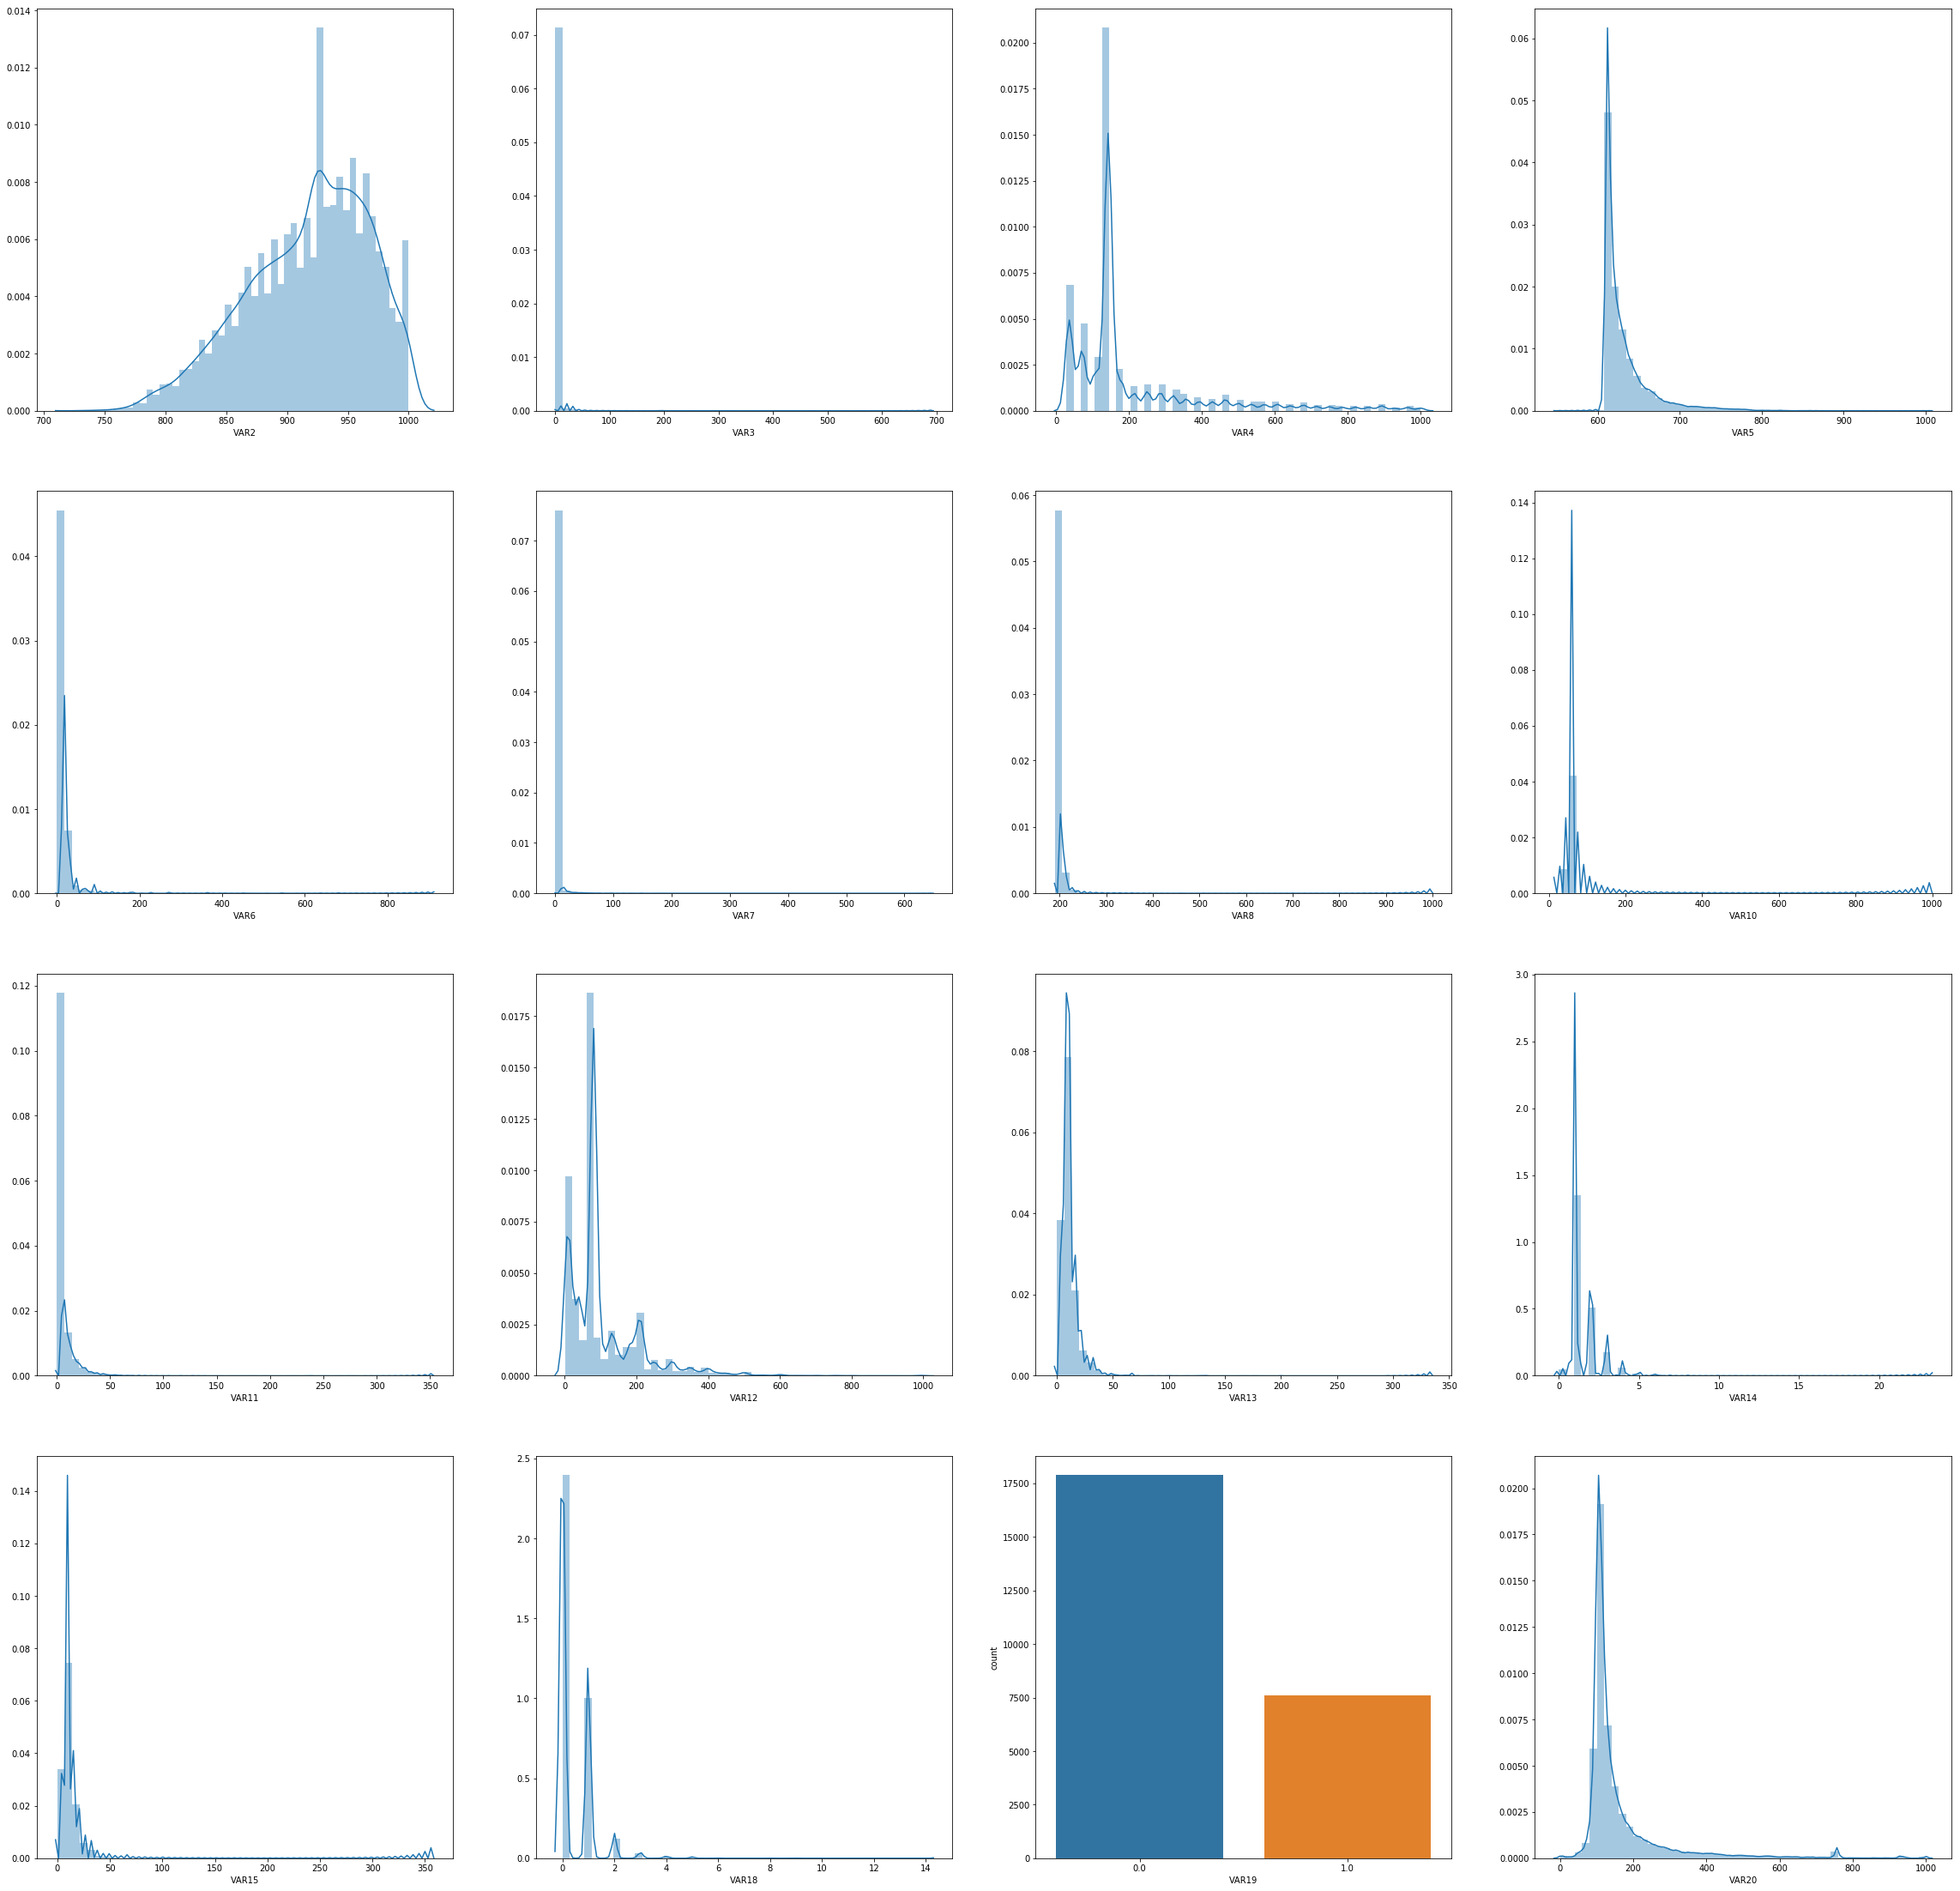

In [42]:
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(X_train_new.columns):
    ax = fig.add_subplot(5, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_new[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(X_train_new[col].dropna(), ax=ax, label=col)

## Trying Iterative Imputer

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [46]:
iter_imp = IterativeImputer(max_iter=150, initial_strategy='median', random_state=2, min_value=0, max_value=1000)

In [47]:
X_train2 = train.drop('VAR21', axis=1)


iter_imp.fit(X_train2)
X_train_iter = pd.DataFrame(iter_imp.transform(X_train2), index=X_train2.index, columns = X_train2.columns)

In [48]:
X_train_iter.head()

VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                       
6730   982.352941  1.000000   71.428571  611.574748  17.006241  0.870128   
12884  910.588235  0.083333  892.857143  638.788955   8.181818  2.932957   
12749  874.117647  0.138889  178.571429  612.007164  13.636364  1.437929   
27420  931.764706  2.405556  103.493631  636.772180  10.909091  1.741903   
24498  937.647059  0.833333  178.571429  613.050565   7.272727  0.585434   

             VAR8      VAR10      VAR11       VAR12      VAR13  VAR14  \
VAR1                                                                    
6730   197.682893  47.899686   3.580655  143.002137  20.000000    2.0   
12884  200.014723  58.632548  12.144835   40.033361   8.115688    2.0   
12749  197.449262  48.141176  11.596416  200.166806  12.333333    2.0   
27420  199.668570  58.632548   7.247927   80.794949  14.497969    3.0   
24498  196.962029  58.632548   2.133702  117.395227   8.666667    1.0   

           VAR15  VAR18  VAR19       VAR20  
VAR1                                        
6730   20.000000    0.0    1.0  141.745267  
12884   9.907690    0.0    0.0  121.888124  
12749  12.333333    0.0    1.0   94.567986  
27420  15.518303    1.0    0.0  756.626506  
24498   8.666667    0.0    0.0  110.149742

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


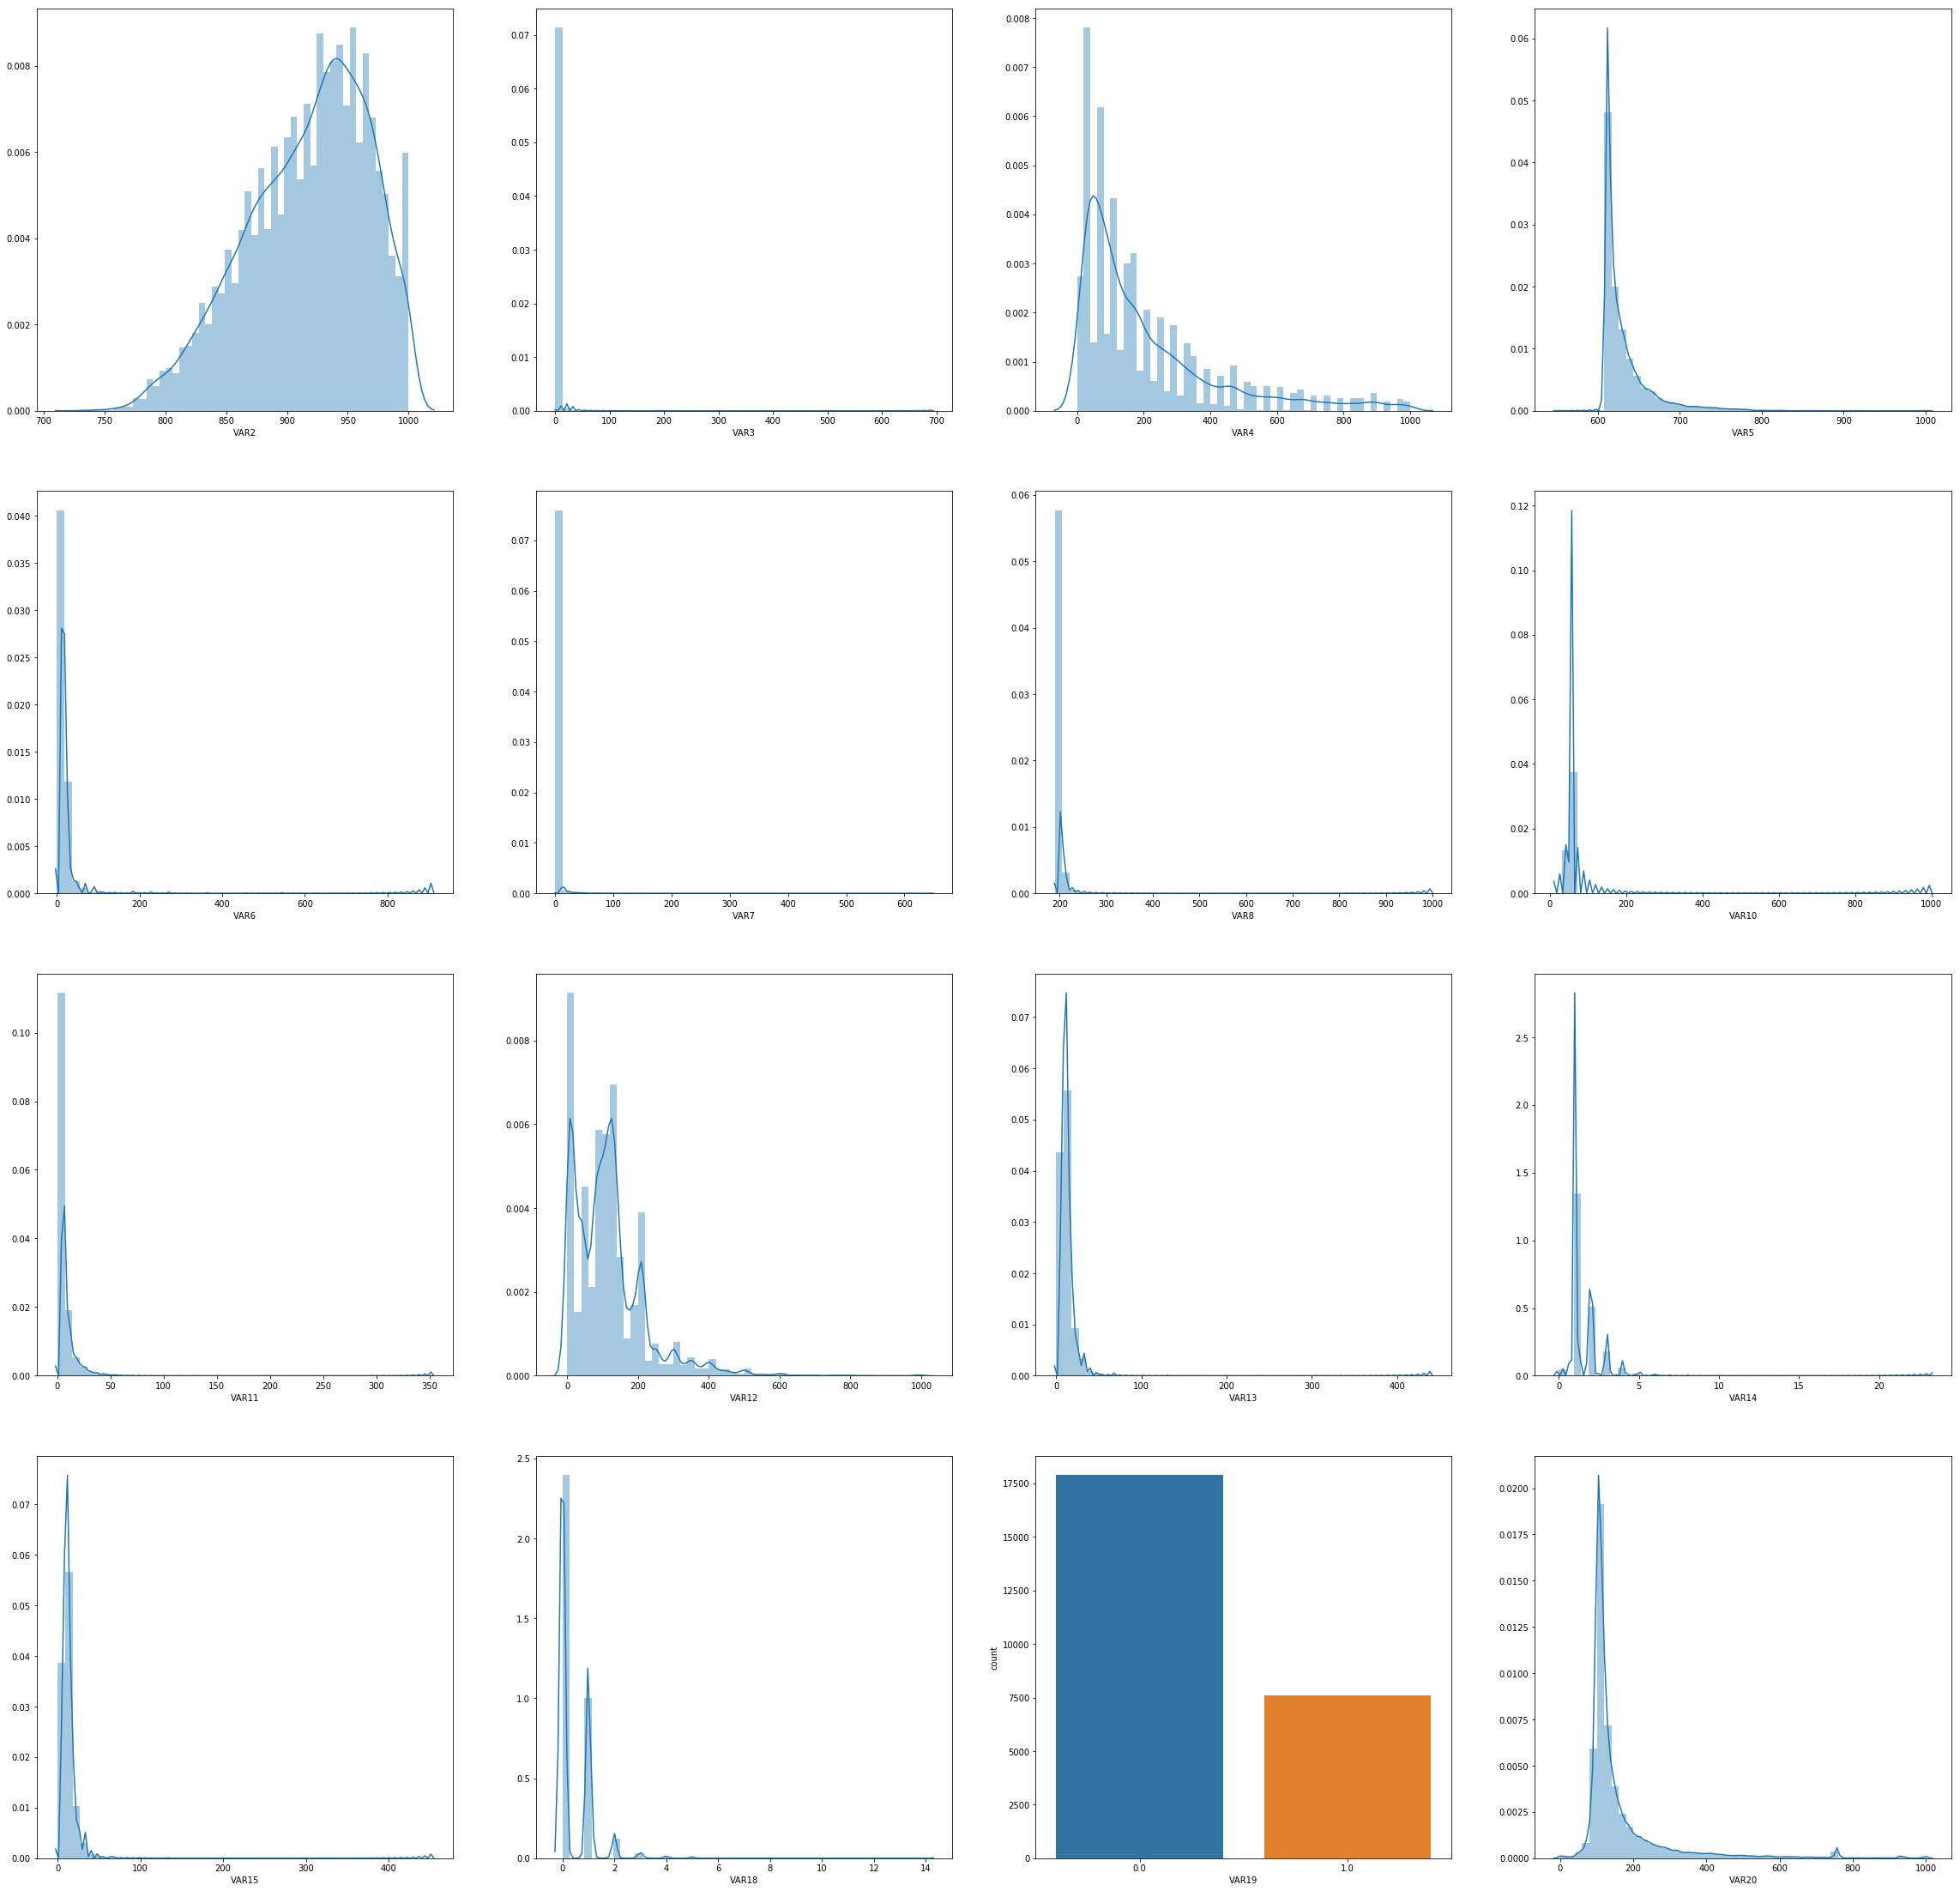

In [49]:
fig = plt.figure(figsize=(40,50))
for i, col in enumerate(X_train_iter.columns):
    ax = fig.add_subplot(5, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_iter[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(X_train_iter[col].dropna(), ax=ax, label=col)

## I'll go with Iterative Imputer

# Generating New Features

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [52]:
def create_interaction(poly, X):
    temp_X = X.drop('VAR19', axis=1)
    
    poly.fit(temp_X)
    new_X = pd.DataFrame(poly.transform(temp_X), index = temp_X.index, columns=poly.get_feature_names(temp_X.columns))
    new_X['VAR19'] = X['VAR19']
    
    return new_X

In [53]:
X_train_trans = create_interaction(poly, X_train_iter)

In [54]:
X_train_trans.head()

1        VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                            
6730   1.0  982.352941  1.000000   71.428571  611.574748  17.006241  0.870128   
12884  1.0  910.588235  0.083333  892.857143  638.788955   8.181818  2.932957   
12749  1.0  874.117647  0.138889  178.571429  612.007164  13.636364  1.437929   
27420  1.0  931.764706  2.405556  103.493631  636.772180  10.909091  1.741903   
24498  1.0  937.647059  0.833333  178.571429  613.050565   7.272727  0.585434   

             VAR8      VAR10      VAR11  ...  VAR13 VAR15  VAR13 VAR18  \
VAR1                                     ...                             
6730   197.682893  47.899686   3.580655  ...   400.000000     0.000000   
12884  200.014723  58.632548  12.144835  ...    80.407724     0.000000   
12749  197.449262  48.141176  11.596416  ...   152.111111     0.000000   
27420  199.668570  58.632548   7.247927  ...   224.983884    14.497969   
24498  196.962029  58.632548   2.133702  ...    75.111111     0.000000   

        VAR13 VAR20  VAR14 VAR15  VAR14 VAR18  VAR14 VAR20  VAR15 VAR18  \
VAR1                                                                      
6730    2834.905336    40.000000          0.0   283.490534     0.000000   
12884    989.206000    19.815380          0.0   243.776248     0.000000   
12749   1166.338497    24.666667          0.0   189.135972     0.000000   
27420  10969.547825    46.554910          3.0  2269.879518    15.518303   
24498    954.631096     8.666667          0.0   110.149742     0.000000   

        VAR15 VAR20  VAR18 VAR20  VAR19  
VAR1                                     
6730    2834.905336     0.000000    1.0  
12884   1207.629770     0.000000    0.0  
12749   1166.338497     0.000000    1.0  
27420  11741.559607   756.626506    0.0  
24498    954.631096     0.000000    0.0  

[5 rows x 122 columns]

## Visualizing Feataures

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


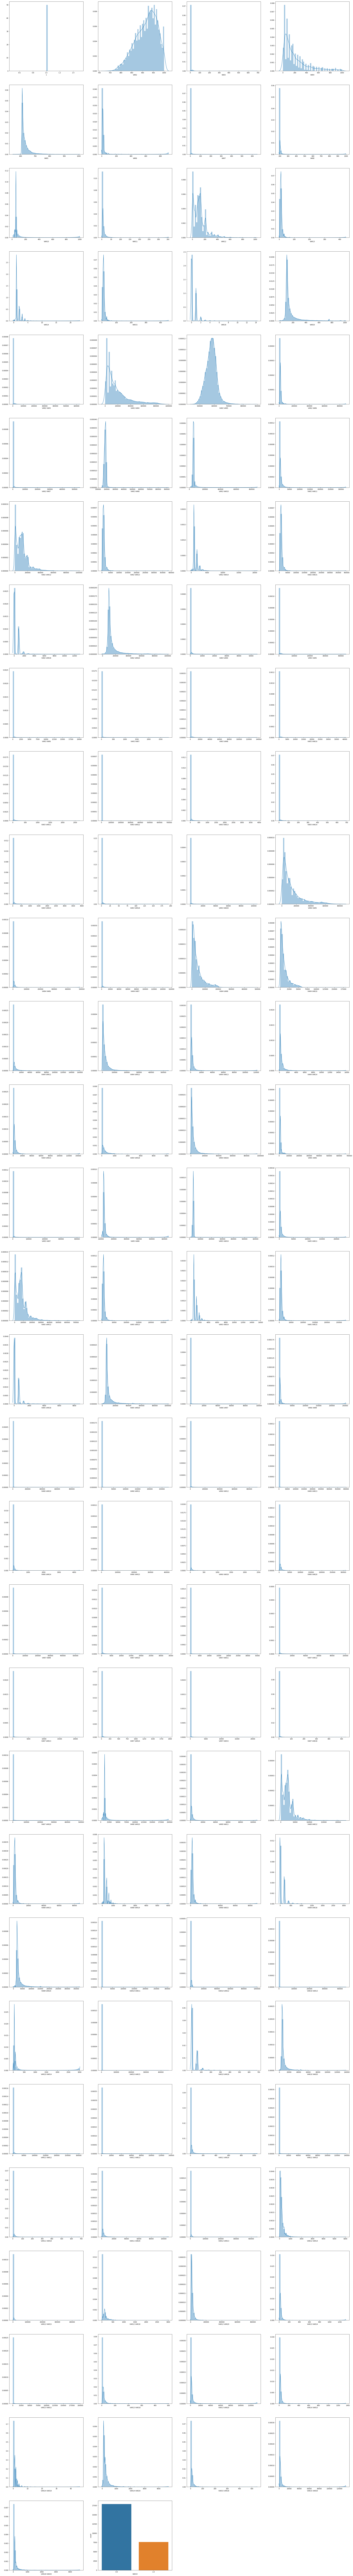

In [55]:
fig = plt.figure(figsize=(40,320))
for i, col in enumerate(X_train_trans.columns):
    ax = fig.add_subplot(32, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_trans[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(X_train_trans[col].dropna(), ax=ax, label=col)

In [56]:
X_train_trans.head()

1        VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                            
6730   1.0  982.352941  1.000000   71.428571  611.574748  17.006241  0.870128   
12884  1.0  910.588235  0.083333  892.857143  638.788955   8.181818  2.932957   
12749  1.0  874.117647  0.138889  178.571429  612.007164  13.636364  1.437929   
27420  1.0  931.764706  2.405556  103.493631  636.772180  10.909091  1.741903   
24498  1.0  937.647059  0.833333  178.571429  613.050565   7.272727  0.585434   

             VAR8      VAR10      VAR11  ...  VAR13 VAR15  VAR13 VAR18  \
VAR1                                     ...                             
6730   197.682893  47.899686   3.580655  ...   400.000000     0.000000   
12884  200.014723  58.632548  12.144835  ...    80.407724     0.000000   
12749  197.449262  48.141176  11.596416  ...   152.111111     0.000000   
27420  199.668570  58.632548   7.247927  ...   224.983884    14.497969   
24498  196.962029  58.632548   2.133702  ...    75.111111     0.000000   

        VAR13 VAR20  VAR14 VAR15  VAR14 VAR18  VAR14 VAR20  VAR15 VAR18  \
VAR1                                                                      
6730    2834.905336    40.000000          0.0   283.490534     0.000000   
12884    989.206000    19.815380          0.0   243.776248     0.000000   
12749   1166.338497    24.666667          0.0   189.135972     0.000000   
27420  10969.547825    46.554910          3.0  2269.879518    15.518303   
24498    954.631096     8.666667          0.0   110.149742     0.000000   

        VAR15 VAR20  VAR18 VAR20  VAR19  
VAR1                                     
6730    2834.905336     0.000000    1.0  
12884   1207.629770     0.000000    0.0  
12749   1166.338497     0.000000    1.0  
27420  11741.559607   756.626506    0.0  
24498    954.631096     0.000000    0.0  

[5 rows x 122 columns]

# Feature Transformation/Scaling

In [57]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [58]:
pt = PowerTransformer(method='box-cox')
minmax = MinMaxScaler()

In [59]:
pt.fit(1+X_train_trans)

E:\AnacondaInstaller\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))


PowerTransformer(copy=True, method='box-cox', standardize=True)

In [60]:
X_train_fin = pd.DataFrame(pt.transform(1+X_train_trans), index = X_train_trans.index, columns = X_train_trans.columns)

In [61]:
X_train_fin.head()

1      VAR2      VAR3      VAR4  VAR5      VAR6      VAR7  VAR8  \
VAR1                                                                       
6730   0.0  1.446457  1.172683 -0.541085   0.0  0.638124 -0.400938   0.0   
12884  0.0 -0.248680 -0.831400  2.141954   0.0 -0.358732  1.363331   0.0   
12749  0.0 -0.924706 -0.564032  0.224784   0.0  0.344067  0.446340   0.0   
27420  0.0  0.197955  1.731956 -0.254531   0.0  0.040453  0.731750   0.0   
24498  0.0  0.329593  1.012268  0.224784   0.0 -0.524026 -1.113067   0.0   

          VAR10     VAR11  ...  VAR13 VAR15  VAR13 VAR18  VAR13 VAR20  \
VAR1                       ...                                          
6730  -1.857809  0.239854  ...     1.139604    -0.694332     0.879978   
12884  0.632115  1.286067  ...    -0.188085    -0.694332    -0.315880   
12749 -1.795117  1.248085  ...     0.312888    -0.694332    -0.137233   
27420  0.632115  0.851753  ...     0.637666     1.513245     2.619447   
24498  0.632115 -0.196917  ...    -0.239609    -0.694332    -0.354068   

       VAR14 VAR15  VAR14 VAR18  VAR14 VAR20  VAR15 VAR18  VAR15 VAR20  \
VAR1                                                                     
6730      1.259629    -0.687200     0.479788    -0.695338     0.805130   
12884     0.397415    -0.687200     0.290881    -0.695338    -0.185963   
12749     0.656945    -0.687200    -0.010728    -0.695338    -0.224759   
27420     1.457141     1.683141     3.980729     1.505802     2.635766   
24498    -0.502553    -0.687200    -0.591061    -0.695338    -0.445744   

       VAR18 VAR20     VAR19  
VAR1                          
6730     -0.700027  1.531601  
12884    -0.700027 -0.652912  
12749    -0.700027  1.531601  
27420     1.561749 -0.652912  
24498    -0.700027 -0.652912  

[5 rows x 122 columns]

# Visualizing Final Features

E:\AnacondaInstaller\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\AnacondaInstaller\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


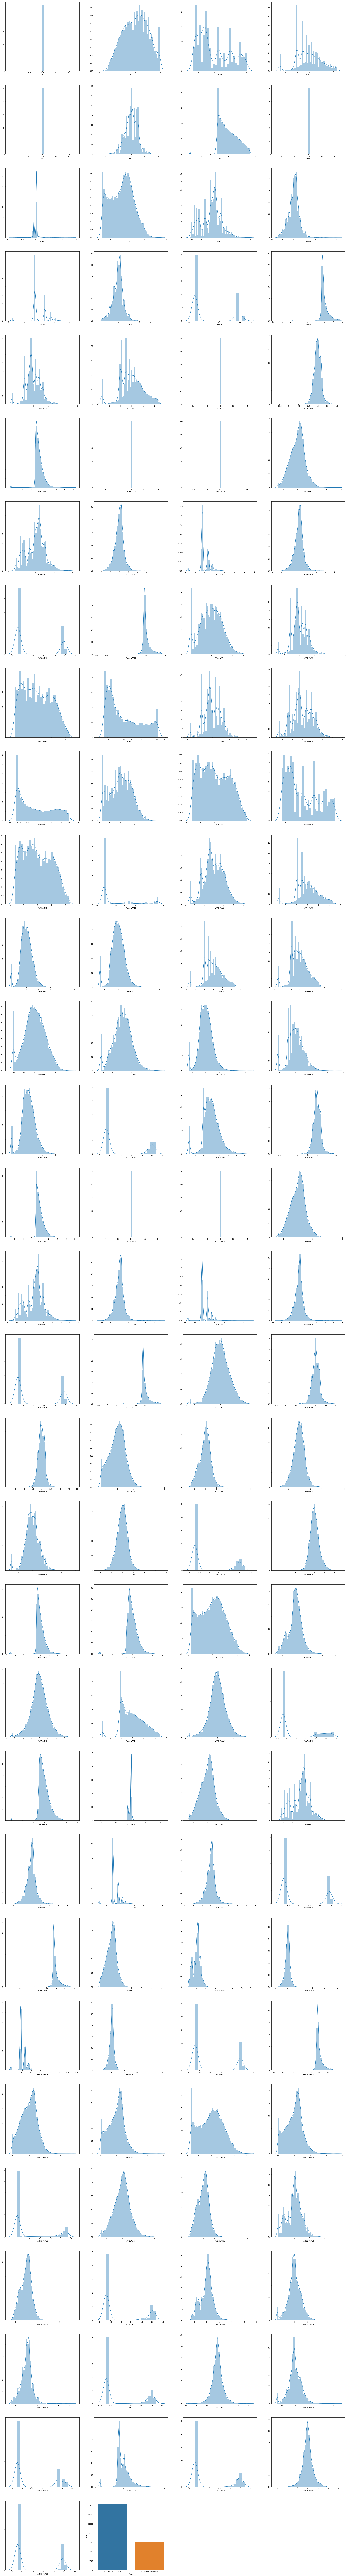

In [62]:
fig = plt.figure(figsize=(40,320))
for i, col in enumerate(X_train_fin.columns):
    ax = fig.add_subplot(32, 4, i+1)
    if col not in categorical_features:
        sns.distplot(X_train_fin[col].dropna(), ax=ax, label=col)
    else:
        sns.countplot(X_train_fin[col].dropna(), ax=ax, label=col)

---------------------------------
# Creating Pipeline

In [91]:
def transform(X, iter_imp, poly, pt):
    
    ## Changes in VAR14
    X['VAR14'].replace('.', np.nan, inplace = True)
    X['VAR14'] = pd.to_numeric(train['VAR14'])
    
    ## Dropping VAR9 and VAR17 due to high missing values
    X.drop(['VAR9','VAR17'], axis = 1, inplace=True)

    ## Setting VAR1 as index
    X.set_index('VAR1', inplace=True)
    
    ## Dropping VAR16 on account of redudancy
    X.drop(['VAR16'], axis = 1, inplace=True)
    
    ## Mising Value Imputation
    X = pd.DataFrame(iter_imp.transform(X), index=X.index, columns = X.columns)
    
    ## Feature generation
    X = create_interaction(poly, X)
    
    ## Feature Scaling
    #X = pd.DataFrame(pt.transform(1+X), index = X.index, columns = X.columns)
    
    return X

In [92]:
val.head()

VAR1        VAR2      VAR3        VAR4        VAR5       VAR6  \
31267  31268  880.000000  0.383044  142.857143  619.995483   8.181818   
14378  14379  942.352941  0.055556   35.714286  632.407753   9.090909   
4114    4115  930.588235  0.388889  178.571429  642.857518  22.727364   
2758    2759  961.176471  0.027778         NaN  622.248599   6.363636   
18077  18078  954.117647  0.388889   35.714286  619.867684   4.545455   

           VAR7        VAR8  VAR9      VAR10  ...       VAR12      VAR13  \
31267  0.742883  197.211381   NaN  58.632548  ...  130.108424  13.066667   
14378  0.994108  197.784742   NaN  58.632548  ...  400.333611   6.666667   
4114   1.870301  204.409101   NaN  58.632548  ...         NaN        NaN   
2758   0.893318  197.470724   NaN  58.632548  ...    5.004170  13.333333   
18077  0.771246  197.759720   NaN  58.632548  ...         NaN  10.000000   

       VAR14      VAR15     VAR16  VAR17  VAR18  VAR19       VAR20   VAR21  
31267      1  13.066667  1.057403    NaN      0      0  109.803787     Low  
14378      1   6.666667  1.265733    NaN      0      0   98.969019  Medium  
4114       2        NaN  1.851504    NaN      0      0   48.709122    High  
2758       1  13.333333  1.134215    NaN      1      0  113.697074     Low  
18077      1  14.666667  1.078627  973.4      0      0  146.130809     Low  

[5 rows x 21 columns]

In [93]:
val.shape

(8500, 21)

In [94]:
leaderboard = pd.read_csv('leaderboard_dataset.csv')

In [95]:
evaluation = pd.read_csv('Evaluation_dataset.csv')

In [96]:
y_val = val['VAR21'].map({'Low':-1, 'Medium':0, 'High':1})
X_val = val.drop('VAR21', axis =1)

In [97]:
X_val.shape

(8500, 20)

In [98]:
X_val = transform(X_val, iter_imp, poly, pt)

In [99]:
X_val.head()

1        VAR2      VAR3        VAR4        VAR5       VAR6      VAR7  \
VAR1                                                                            
31268  1.0  880.000000  0.383044  142.857143  619.995483   8.181818  0.742883   
14379  1.0  942.352941  0.055556   35.714286  632.407753   9.090909  0.994108   
4115   1.0  930.588235  0.388889  178.571429  642.857518  22.727364  1.870301   
2759   1.0  961.176471  0.027778   67.202246  622.248599   6.363636  0.893318   
18078  1.0  954.117647  0.388889   35.714286  619.867684   4.545455  0.771246   

             VAR8      VAR10     VAR11  ...  VAR13 VAR15  VAR13 VAR18  \
VAR1                                    ...                             
31268  197.211381  58.632548  1.286181  ...   170.737778     0.000000   
14379  197.784742  58.632548  0.141369  ...    44.444444     0.000000   
4115   204.409101  58.632548  5.339338  ...   156.382038     0.000000   
2759   197.470724  58.632548  0.731793  ...   177.777778    13.333333   
18078  197.759720  58.632548  6.147473  ...   146.666667     0.000000   

       VAR13 VAR20  VAR14 VAR15  VAR14 VAR18  VAR14 VAR20  VAR15 VAR18  \
VAR1                                                                     
31268  1434.769479    13.066667      0.00000   109.803787     0.000000   
14379   659.793460     8.103457      0.00000   120.298673     0.000000   
4115    591.381398    18.835968      0.00000    71.230950     0.000000   
2759   1515.960986    17.580134      1.31851   149.910738    13.333333   
18078  1461.308090    14.666667      0.00000   146.130809     0.000000   

       VAR15 VAR20  VAR18 VAR20  VAR19  
VAR1                                    
31268  1434.769479     0.000000    0.0  
14379   659.793460     0.000000    0.0  
4115    627.393214     0.000000    0.0  
2759   1515.960986   113.697074    0.0  
18078  2143.251866     0.000000    0.0  

[5 rows x 122 columns]

In [100]:
X_leader = transform(leaderboard, iter_imp, poly, pt)

In [101]:
X_evaluation = transform(evaluation, iter_imp, poly, pt)

-----------------------------------------
# Modelling

## Creating Helpful Functions

In [102]:
# Scorer Function
def my_scorer(y, y_pred):
    
    score = 1000*(y_pred==y).sum() - 50*((y_pred==0) & (y==1)).sum() - 50*((y_pred==1) & (y==2)).sum() - 100*((y_pred==1) & (y==0)).sum() - 100*((y_pred==0) & (y==2)).sum() - 200*((y_pred==2) & (y==0)).sum()
    
    return score

In [103]:
from sklearn.metrics import make_scorer
my_score = make_scorer(my_scorer, greater_is_better=True)

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [105]:
def print_results(clf, X_train, y_train, X_val, y_val):
    print('Training acc: ', clf.score(X_train.values, y_train.values))
    print('Validation acc: ', clf.score(X_val.values, y_val.values))
    print('Training score: ', my_score(clf, X_train.values, y_train.values))
    print('Validation score: ', my_score(clf, X_val.values, y_val.values))
    print('Confusion Matrix for Training:')
    print(confusion_matrix(y_train.values, clf.predict(X_train.values)))
    print('Confusion Matrix for Validation:')
    print(confusion_matrix(y_val.values, clf.predict(X_val.values)))

## LogisticRegression

In [78]:
lr = LogisticRegression()

In [106]:
lr.fit(X_train_trans, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaInstaller\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
print_results(lr, X_train_trans, y_train, X_val, y_val)

Training acc:  0.552186703275152
Validation acc:  0.5529411764705883
Training score:  13952800
Validation score:  4659400
Confusion Matrix for Training:
[[ 1816  7184    20]
 [ 1386 12229    27]
 [  350  2450    33]]
Confusion Matrix for Validation:
[[ 622 2433    5]
 [ 444 4068   14]
 [ 120  784   10]]


In [81]:
rf = RandomForestClassifier()

In [110]:
rf.fit(X_train_trans, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
print_results(rf, X_train_trans, y_train, X_val, y_val)

Training acc:  0.9830947244557756
Validation acc:  0.518
Training score:  25056650
Validation score:  4361750
Confusion Matrix for Training:
[[ 8910   109     1]
 [  132 13507     3]
 [   45   141  2647]]
Confusion Matrix for Validation:
[[1415 1601   44]
 [1487 2927  112]
 [ 252  601   61]]


In [90]:
for i, col in enumerate(X_train_fin.columns):
    print(col, rf.feature_importances_[i])

1 0.0
VAR2 0.014335367943837597
VAR3 0.005852878161973336
VAR4 0.007605986002562274
VAR5 0.0
VAR6 0.0065082451956338895
VAR7 0.008319184723223022
VAR8 0.0
VAR10 0.004642605203523022
VAR11 0.009070286259610445
VAR12 0.007220465348030952
VAR13 0.006867290203922007
VAR14 0.001672447396715251
VAR15 0.006822941038336421
VAR18 0.0010299468918060842
VAR20 0.020466272684323668
VAR2 VAR3 0.009747301526772164
VAR2 VAR4 0.012857620179455093
VAR2 VAR5 0.0
VAR2 VAR6 0.010326326537408295
VAR2 VAR7 0.009812750856877522
VAR2 VAR8 0.0
VAR2 VAR10 0.0
VAR2 VAR11 0.008381892777462248
VAR2 VAR12 0.009655827883375597
VAR2 VAR13 0.008199090977171461
VAR2 VAR14 0.011050016286449844
VAR2 VAR15 0.008206951225255735
VAR2 VAR18 0.004323513465907901
VAR2 VAR20 0.012610163510149435
VAR3 VAR4 0.009772203591828935
VAR3 VAR5 0.009174687028611201
VAR3 VAR6 0.010385382821428719
VAR3 VAR7 0.0109153137890883
VAR3 VAR8 0.009002195508112234
VAR3 VAR10 0.00763807825178265
VAR3 VAR11 0.010751720841931963
VAR3 VAR12 0.01071585

In [112]:
ada = AdaBoostClassifier()

In [113]:
ada.fit(X_train_trans, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [114]:
print_results(ada, X_train_trans, y_train, X_val, y_val)

Training acc:  0.5719160619729359
Validation acc:  0.5663529411764706
Training score:  14454150
Validation score:  4772800
Confusion Matrix for Training:
[[ 2941  6051    28]
 [ 2044 11504    94]
 [  348  2349   136]]
Confusion Matrix for Validation:
[[ 947 2101   12]
 [ 666 3823   37]
 [ 120  750   44]]


In [115]:
for i, col in enumerate(X_train_fin.columns):
    print(col, ada.feature_importances_[i])

1 0.0
VAR2 0.02
VAR3 0.02
VAR4 0.0
VAR5 0.0
VAR6 0.0
VAR7 0.0
VAR8 0.0
VAR10 0.0
VAR11 0.0
VAR12 0.0
VAR13 0.0
VAR14 0.0
VAR15 0.0
VAR18 0.0
VAR20 0.06
VAR2 VAR3 0.0
VAR2 VAR4 0.04
VAR2 VAR5 0.02
VAR2 VAR6 0.0
VAR2 VAR7 0.0
VAR2 VAR8 0.02
VAR2 VAR10 0.0
VAR2 VAR11 0.0
VAR2 VAR12 0.0
VAR2 VAR13 0.0
VAR2 VAR14 0.0
VAR2 VAR15 0.0
VAR2 VAR18 0.0
VAR2 VAR20 0.04
VAR3 VAR4 0.02
VAR3 VAR5 0.0
VAR3 VAR6 0.0
VAR3 VAR7 0.02
VAR3 VAR8 0.0
VAR3 VAR10 0.02
VAR3 VAR11 0.02
VAR3 VAR12 0.0
VAR3 VAR13 0.02
VAR3 VAR14 0.0
VAR3 VAR15 0.02
VAR3 VAR18 0.02
VAR3 VAR20 0.02
VAR4 VAR5 0.02
VAR4 VAR6 0.02
VAR4 VAR7 0.0
VAR4 VAR8 0.0
VAR4 VAR10 0.0
VAR4 VAR11 0.04
VAR4 VAR12 0.02
VAR4 VAR13 0.0
VAR4 VAR14 0.0
VAR4 VAR15 0.0
VAR4 VAR18 0.0
VAR4 VAR20 0.08
VAR5 VAR6 0.0
VAR5 VAR7 0.0
VAR5 VAR8 0.0
VAR5 VAR10 0.02
VAR5 VAR11 0.0
VAR5 VAR12 0.0
VAR5 VAR13 0.0
VAR5 VAR14 0.0
VAR5 VAR15 0.0
VAR5 VAR18 0.0
VAR5 VAR20 0.02
VAR6 VAR7 0.0
VAR6 VAR8 0.02
VAR6 VAR10 0.0
VAR6 VAR11 0.0
VAR6 VAR12 0.02
VAR6 VAR13 0.0
VAR6 VA

In [123]:
svc = SVC(C=0.5)

In [124]:
svc.fit(X_train_trans, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [125]:
print_results(svc, X_train_trans, y_train, X_val, y_val)

Training acc:  0.5350853108452638
Validation acc:  0.5324705882352941
Training score:  13500350
Validation score:  4480300
Confusion Matrix for Training:
[[    0  9020     0]
 [    0 13642     0]
 [    0  2833     0]]
Confusion Matrix for Validation:
[[   0 3060    0]
 [   0 4526    0]
 [   0  914    0]]


In [156]:
# Hyperparameter tuning on RandomForest
param_grid = {'bootstrap': [True],
 'max_depth': [2,5,7,10,15],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 4, 10, 15],
 'min_samples_split': [5, 7, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 50, cv = 5, scoring = my_score, random_state=42, n_jobs = -1)

In [157]:
rf_random.fit(X_train_trans, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [158]:
print_results(rf_random, X_train_trans, y_train, X_val, y_val)

Training acc:  16295750
Validation acc:  4786250
Training score:  16295750
Validation score:  4786250
Confusion Matrix for Training:
[[ 3705  5309     6]
 [ 1146 12488     8]
 [  305  2309   219]]
Confusion Matrix for Validation:
[[ 894 2164    2]
 [ 610 3907    9]
 [ 112  777   25]]


In [159]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [160]:
xgb = XGBClassifier()

In [163]:
xgb.fit(X_train_trans.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [164]:
print_results(xgb, X_train_trans, y_train, X_val, y_val)

Training acc:  0.5974112571092371
Validation acc:  0.5702352941176471
Training score:  15112300
Validation score:  4807650
Confusion Matrix for Training:
[[ 3255  5754    11]
 [ 1812 11800    30]
 [  343  2314   176]]
Confusion Matrix for Validation:
[[ 962 2095    3]
 [ 655 3852   19]
 [ 132  749   33]]


In [165]:
# Hyperparameter tuning on XGB
# Hyperparameter tuning on RandomForest
param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, n_iter = 50, cv = 5, scoring = my_score, random_state=42, n_jobs = 2)

In [166]:
xgb_random.fit(X_train_trans.values, y_train.values)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,...
                                           verbosity=1),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                    

In [167]:
print_results(xgb_random, X_train_trans, y_train, X_val, y_val)

Training acc:  15485650
Validation acc:  4837350
Training score:  15485650
Validation score:  4837350
Confusion Matrix for Training:
[[ 3460  5542    18]
 [ 1732 11893    17]
 [  354  2233   246]]
Confusion Matrix for Validation:
[[1009 2045    6]
 [ 671 3826   29]
 [ 137  735   42]]


In [169]:
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Unsupervised Learning

In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA()

In [128]:
pca.fit(X_train_trans, y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [129]:
pca.explained_variance_ratio_

array([5.83734311e-01, 2.17234326e-01, 1.44585263e-01, 1.41381492e-02,
       1.18152745e-02, 8.97710759e-03, 3.89152424e-03, 3.35898108e-03,
       2.84328252e-03, 2.44354041e-03, 1.49613200e-03, 1.45543345e-03,
       8.21006401e-04, 6.97902979e-04, 5.87070892e-04, 3.15975029e-04,
       2.60378009e-04, 2.00174907e-04, 1.64302570e-04, 1.43475314e-04,
       1.33994848e-04, 1.01534868e-04, 8.08779323e-05, 8.01538301e-05,
       6.32694380e-05, 4.81985296e-05, 4.53917231e-05, 4.12458357e-05,
       3.79021916e-05, 2.82957852e-05, 2.66816691e-05, 1.60182136e-05,
       1.49047581e-05, 1.29963292e-05, 1.27019283e-05, 1.22485144e-05,
       9.85436426e-06, 8.01720710e-06, 7.91319165e-06, 6.70267589e-06,
       6.61238047e-06, 5.48811808e-06, 4.46451531e-06, 4.38502437e-06,
       3.99324323e-06, 2.99802067e-06, 2.76226082e-06, 2.51512047e-06,
       2.28076897e-06, 1.83189941e-06, 1.68245726e-06, 1.25252835e-06,
       1.06828493e-06, 9.74451069e-07, 7.92194947e-07, 5.79415332e-07,
      

In [131]:
cdf = 0
for i in pca.explained_variance_ratio_:
    print(cdf)
    cdf+=i

0
0.583734311322423
0.8009686374562347
0.9455539006631621
0.9596920498310664
0.9715073243717186
0.9804844319634377
0.9843759562007115
0.987734937282969
0.9905782198062921
0.993021760218592
0.9945178922174457
0.9959733256688067
0.9967943320694895
0.9974922350488339
0.9980793059407191
0.9983952809696639
0.9986556589783037
0.9988558338852894
0.9990201364548512
0.9991636117693293
0.9992976066177991
0.9993991414862567
0.9994800194185299
0.9995601732486372
0.9996234426865981
0.9996716412162306
0.9997170329393065
0.9997582787749771
0.999796180966529
0.9998244767517547
0.9998511584208234
0.9998671766344723
0.999882081392612
0.999895077721852
0.9999077796501901
0.9999200281646344
0.999929882528893
0.9999378997359959
0.999945812927644
0.9999525156035357
0.9999591279840104
0.9999646161020913
0.9999690806174056
0.9999734656417757
0.9999774588850063
0.999980456905679
0.9999832191664979
0.9999857342869705
0.9999880150559419
0.9999898469553522
0.9999915294126163
0.9999927819409699
0.999993850225895
0

# We see that first 2 components are enough to get 80% variance

In [173]:
pca = PCA()

In [174]:
pca.fit(X_train_trans, y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [175]:
pca.explained_variance_ratio_

array([5.83734311e-01, 2.17234326e-01, 1.44585263e-01, 1.41381492e-02,
       1.18152745e-02, 8.97710759e-03, 3.89152424e-03, 3.35898108e-03,
       2.84328252e-03, 2.44354041e-03, 1.49613200e-03, 1.45543345e-03,
       8.21006401e-04, 6.97902979e-04, 5.87070892e-04, 3.15975029e-04,
       2.60378009e-04, 2.00174907e-04, 1.64302570e-04, 1.43475314e-04,
       1.33994848e-04, 1.01534868e-04, 8.08779323e-05, 8.01538301e-05,
       6.32694380e-05, 4.81985296e-05, 4.53917231e-05, 4.12458357e-05,
       3.79021916e-05, 2.82957852e-05, 2.66816691e-05, 1.60182136e-05,
       1.49047581e-05, 1.29963292e-05, 1.27019283e-05, 1.22485144e-05,
       9.85436426e-06, 8.01720710e-06, 7.91319165e-06, 6.70267589e-06,
       6.61238047e-06, 5.48811808e-06, 4.46451531e-06, 4.38502437e-06,
       3.99324323e-06, 2.99802067e-06, 2.76226082e-06, 2.51512047e-06,
       2.28076897e-06, 1.83189941e-06, 1.68245726e-06, 1.25252835e-06,
       1.06828493e-06, 9.74451069e-07, 7.92194947e-07, 5.79415332e-07,
      

In [176]:
X_train_pca = pca.transform(X_train_trans)

In [177]:
X_train_pca

array([[-1.52915081e+05, -8.62406371e+03,  1.66732570e+04, ...,
        -2.07774070e-03, -3.53454583e-03, -3.61216890e-12],
       [ 7.80549072e+05, -1.01467303e+05, -1.53726932e+04, ...,
        -2.58873746e-02,  1.82540940e-03,  9.46121198e-13],
       [-4.78098100e+04, -8.99764156e+04,  6.79157423e+04, ...,
         2.04057106e-02, -8.32508422e-03,  6.06522559e-14],
       ...,
       [-2.17578928e+05, -8.02424305e+04,  1.72799224e+05, ...,
        -5.41232911e-03,  3.00264782e-03,  2.31817078e-13],
       [-2.20425586e+04, -3.84262922e+04, -9.88758665e+04, ...,
        -5.63675779e-03, -4.01978315e-03, -7.71441713e-13],
       [-1.91411230e+05, -4.04732548e+04, -1.06950593e+04, ...,
         9.61803047e-03,  4.62463834e-03,  3.88095217e-13]])

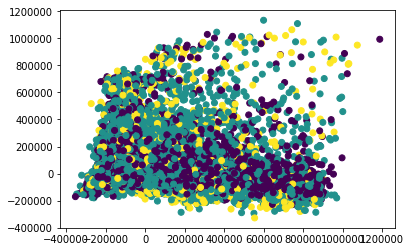

In [178]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)

In [ ]:
svc.fit(X_train_pca, y_train)

E:\AnacondaInstaller\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
X_val_pca = pca.transform(X_val)

In [ ]:
print_results(svc, X_train_pca, y_train, X_val_pca, y_val)